## 1. 문제 있는 데이터 불러오기
----
시카고 범죄 데이터 분석

In [ ]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

# 경로 설정
import os
os.chdir('/content/drive/MyDrive/final_pj')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/final_pj'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

### 문제 발생 : 불러와지지 않는 행 확인

In [ ]:
df1 = pd.read_csv("Chicago_Crimes_2001_to_2004.csv")
df1.head()

ParserError: Error tokenizing data. C error: Expected 23 fields in line 1513591, saw 24


In [ ]:
# 정확하게 오류 있는 줄 찾기
import csv

with open("Chicago_Crimes_2001_to_2004.csv", encoding='utf-8') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if len(row) != 23:
            print(f"⚠️ 문제 있는 줄: {i + 1}, 열 개수: {len(row)}")

⚠️ 문제 있는 줄: 1513591, 열 개수: 24
⚠️ 문제 있는 줄: 1602850, 열 개수: 21


In [ ]:
# 1513591번째 줄 확인

with open("Chicago_Crimes_2001_to_2004.csv", encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i == 1513590:  # 0부터 시작이니까 -1 해야 정확함
            print(line)

5118764,,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location



In [ ]:
# 1602850번째 줄 확인

with open("Chicago_Crimes_2001_to_2004.csv", encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i == 1602849:  # 0부터 시작이니까 -1 해야 정확함
            print(line)

3629582,1423259,G139165,03/10/2001 11:30:00 PM,035XX S FEDERAL ST,1340,CRIMINAL DAMAGE,TO STATE SUP PROP,CHA PARKING LOT/GROUNDS,True,False,211,2.0,,,14,1176246.0,18 08:55:02 AM,41.789832136,-87.672973835,"(41.789832136, -87.672973835)"



- Chicago_Crimes_2001_to_2004.csv
  - 1513591번째 줄에서 값이 아닌 csv 헤더가 다시 등장 -> 열 이름이 들어감
  - 1602850번째 줄에서 Y Coordinate 필드에 날짜/시간 형식이 섞여서 필드 파싱이 꼬임 -> 뒤 필드들이 밀려서 총 21개 필드만 인식됨

In [ ]:
df2 = pd.read_csv("Chicago_Crimes_2005_to_2007.csv")
df2.head()

ParserError: Error tokenizing data. C error: Expected 23 fields in line 533719, saw 24


In [ ]:
# 정확하게 오류 있는 줄 찾기
import csv

with open("Chicago_Crimes_2005_to_2007.csv", encoding='utf-8') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if len(row) != 23:
            print(f"⚠️ 문제 있는 줄: {i + 1}, 열 개수: {len(row)}")

⚠️ 문제 있는 줄: 533719, 열 개수: 24


In [ ]:
with open("Chicago_Crimes_2005_to_2007.csv", encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i == 533718:  # 0부터 시작이니까 -1 해야 정확함
            print(line)

537288,5601758,HN409865,06/16/2007 08:15:00 PM,020XX E 94TH ST,1330,CRIMINAL TRESPASS,TO LAND,OTHER RAILROAD PROP / TRAIN DEPOT,False,False,413,4.0,8.0,48.0,26,1191237.0,1843038.0,2007,04/15/2016 08:55:02 AM,41.724300463,-87.575094193,"(41.724300463, -87.5,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location



- Chicago_Crimes_2005_to_2007.csv
  - 533719번 째 줄에서 값과 헤더 섞임

In [ ]:
df3 = pd.read_csv("Chicago_Crimes_2008_to_2011.csv")
df3.head()

ParserError: Error tokenizing data. C error: Expected 23 fields in line 1149094, saw 41


In [ ]:
# 정확하게 오류 있는 줄 찾기
import csv

with open("Chicago_Crimes_2008_to_2011.csv", encoding='utf-8') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if len(row) != 23:
            print(f"⚠️ 문제 있는 줄: {i + 1}, 열 개수: {len(row)}")

⚠️ 문제 있는 줄: 1149094, 열 개수: 41


In [ ]:
with open("Chicago_Crimes_2008_to_2011.csv", encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i == 1149093:  # 0부터 시작이니까 -1 해야 정확함
            print(line)

2023517,7818233,HS626859,11/21/2010 11:00:00 PM,079XX S JEFFERY BLVD,0460,BATTERY,SIMPLE,STREET,False,False,414,4.0,8.0,46.0,08B,1190912.0,1852820.0,2010,02/04/2016 06:33:39 AM,41.751151039,-87.1:00:00 AM,031XX W LEXINGTON ST,0810,THEFT,OVER $500,STREET,False,False,1134,11.0,24.0,27.0,06,,,2008,08/17/2015 03:03:40 PM,,,



- Chicago_Crimes_2008_to_2011.csv
  - 1149094번 째 줄에서 두 데이터가 섞인 것으로 확인

In [ ]:
df4 = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")
df4.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


### 결론 : 문제 있는 행 제외 후 불러오기
----
on_bad_lines='skip' 옵션 사용하기

## 2. 데이터 살펴보기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = "/content/drive/MyDrive/data/Chicago_Crimes_2001_to_2004.csv"
df1 = pd.read_csv(path, on_bad_lines='skip', low_memory=False)

In [ ]:
path = "/content/drive/MyDrive/data/Chicago_Crimes_2005_to_2007.csv"
df2 = pd.read_csv(path, on_bad_lines='skip', low_memory=False)

In [ ]:
path = "/content/drive/MyDrive/data/Chicago_Crimes_2008_to_2011.csv"
df3 = pd.read_csv(path, on_bad_lines='skip', low_memory=False)

In [ ]:
path = "/content/drive/MyDrive/data/Chicago_Crimes_2012_to_2017.csv"
df4 = pd.read_csv(path, on_bad_lines='skip', low_memory=False)

In [ ]:
# 데이터 병합
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [ ]:
# 깨진 행 없이 정상적으로 불러와졌는지 확인
print("df rows:", len(df1))
print("df2 rows:", len(df2))
print("df3 rows:", len(df3))
print("df4 rows:", len(df4))
print("병합 후:", len(df))

df rows: 1923515
df2 rows: 1872343
df3 rows: 2688710
df4 rows: 1456714
병합 후: 7941282


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/merge_data.csv")

In [ ]:
from google.colab import data_table
import pandas as pd

# 데이터 속성 리스트 (실제 dtype 기준 반영)
crime_attributes_updated = [
    [1, "Unnamed: 0", "원본 파일에서 자동 생성된 인덱스 열", "정수형 (int64)"],
    [2, "ID", "사건 기록의 고유 식별자", "정수형 (int64)"],
    [3, "Case Number", "시카고 경찰청 사건 번호", "문자형 (object)"],
    [4, "Date", "사건 발생 날짜 및 시간", "문자형 (datetime 변환 필요)"],
    [5, "Block", "사건이 발생한 주소 (블록 단위)", "문자형 (object)"],
    [6, "IUCR", "일리노이 범죄 코드", "문자형 (object)"],
    [7, "Primary Type", "주요 범죄 유형", "문자형 (범주형 분석 가능)"],
    [8, "Description", "세부 범죄 유형", "문자형 (범주형 분석 가능)"],
    [9, "Location Description", "사건 발생 장소 설명", "문자형 (범주형 분석 가능)"],
    [10, "Arrest", "체포 여부", "불리언형 (bool)"],
    [11, "Domestic", "가정폭력 관련 여부", "불리언형 (bool)"],
    [12, "Beat", "사건 발생 경찰 비트 번호", "정수형 (int64, 범주처럼 사용 가능)"],
    [13, "District", "사건 발생 경찰 구역 번호", "실수형 (float64, 일부 결측 있음)"],
    [14, "Ward", "시의회 선거구 번호", "실수형 (float64, 일부 결측 있음)"],
    [15, "Community Area", "시카고 커뮤니티 지역 번호", "실수형 (float64, 일부 결측 있음)"],
    [16, "FBI Code", "FBI 범죄 분류 코드", "문자형 (object)"],
    [17, "X Coordinate", "X 좌표 (Illinois State Plane 기준)", "실수형 (float64, 결측 가능)"],
    [18, "Y Coordinate", "Y 좌표 (Illinois State Plane 기준)", "문자형 (object → 좌표 오류 가능성 있음)"],
    [19, "Year", "사건 발생 연도", "실수형 (float64 → int 변환 필요)"],
    [20, "Updated On", "기록이 마지막으로 갱신된 시점", "문자형 (datetime 변환 필요)"],
    [21, "Latitude", "위도 (일부 조정된 위치)", "문자형 (object → float 변환 필요)"],
    [22, "Longitude", "경도 (일부 조정된 위치)", "실수형 (float64)"],
    [23, "Location", "위도와 경도가 함께 포함된 문자열 위치 정보", "문자형 ('(위도, 경도)' 형식)"]
]

# 데이터프레임 생성
df_crime_attributes_updated = pd.DataFrame(crime_attributes_updated, columns=["번호", "속성명", "설명", "데이터 유형"])

# Colab에서 시각화
data_table.DataTable(df_crime_attributes_updated, include_index=False)

,번호,속성명,설명,데이터 유형
0,1,Unnamed: 0,원본 파일에서 자동 생성된 인덱스 열,정수형 (int64)
1,2,ID,사건 기록의 고유 식별자,정수형 (int64)
2,3,Case Number,시카고 경찰청 사건 번호,문자형 (object)
3,4,Date,사건 발생 날짜 및 시간,문자형 (datetime 변환 필요)
4,5,Block,사건이 발생한 주소 (블록 단위),문자형 (object)
5,6,IUCR,일리노이 범죄 코드,문자형 (object)
6,7,Primary Type,주요 범죄 유형,문자형 (범주형 분석 가능)
7,8,Description,세부 범죄 유형,문자형 (범주형 분석 가능)
8,9,Location Description,사건 발생 장소 설명,문자형 (범주형 분석 가능)
9,10,Arrest,체포 여부,불리언형 (bool)


In [ ]:
# 병합한 데이터의 결측치 확인
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
Case Number,7
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,1990
Arrest,0


In [ ]:
# Block + 위도 + 경도 조합별로 몇 번 나타났는지 카운트
unique_coords = df[['Block', 'Latitude', 'Longitude']].dropna().drop_duplicates()

# Block별 위경도 조합 개수 세기
coord_variety = unique_coords.groupby('Block').size().reset_index(name='CoordCount')

# 여러 좌표가 있는 Block만 필터링
multiple_coords = coord_variety[coord_variety['CoordCount'] > 1]

print(f"Block 개수: {df['Block'].nunique():,}")
print(f"여러 좌표를 가진 Block 수: {len(multiple_coords):,}")

Block 개수: 58,776
여러 좌표를 가진 Block 수: 52,991


In [ ]:
from collections import Counter

# 위경도 있는 행만
df_nonnull = df[df['Latitude'].notnull() & df['Longitude'].notnull()][['Block', 'Latitude', 'Longitude']]

# 그룹 결과를 순차적으로 처리
block_to_coord = {}

for block, group in df_nonnull.groupby('Block'):
    coords = list(zip(group['Latitude'], group['Longitude']))
    mode_coord = Counter(coords).most_common(1)[0][0]  # 최빈 위경도 튜플
    block_to_coord[block] = mode_coord

In [ ]:
# 결측치 있는 행만 필터링
mask_coords = df['Latitude'].isnull() | df['Longitude'].isnull()

# Block 기준 매핑해서 위경도 채우기
df.loc[mask_coords, 'Latitude'] = df.loc[mask_coords, 'Block'].map(lambda b: block_to_coord.get(b, (None, None))[0])
df.loc[mask_coords, 'Longitude'] = df.loc[mask_coords, 'Block'].map(lambda b: block_to_coord.get(b, (None, None))[1])

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
Case Number,7
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,1990
Arrest,0


In [ ]:
# 채워진 위경도 값을 기반으로 Location 칼럼 채우기
# 위경도는 있는데 Location은 없는 경우만 선택
mask_location_fill = (
    df['Location'].isnull() &
    df['Latitude'].notnull() &
    df['Longitude'].notnull()
)

# 해당 조건을 만족하는 행에 대해 Location 생성
df.loc[mask_location_fill, 'Location'] = df.loc[mask_location_fill].apply(
    lambda row: f"({row['Latitude']}, {row['Longitude']})", axis=1
)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
Case Number,7
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,1990
Arrest,0


- 현재 위경도는 EPSG:4326 (WGS 84) 기준 (위도/경도)
- 시카고 시공간 데이터에서 사용하는 X/Y는 보통 EPSG:3435 (Illinois State Plane East NAD83) 좌표계
- 그래서 → GeoDataFrame으로 바꾼 후 → 좌표계 변환 → X/Y 추출 필요!

In [ ]:
import geopandas as gpd
from geopandas import points_from_xy

# 위경도 결측치 없는 행만 선택
geo_mask = df['Latitude'].notnull() & df['Longitude'].notnull()
df_geo = df.loc[geo_mask, ['Latitude', 'Longitude']].copy()

# 벡터화된 포인트 생성
df_geo['geometry'] = points_from_xy(df_geo['Longitude'], df_geo['Latitude'])

# GeoDataFrame 변환
gdf = gpd.GeoDataFrame(df_geo, geometry='geometry', crs='EPSG:4326')

In [ ]:
# 좌표계 변환
gdf_3435 = gdf.to_crs(epsg=3435)

In [ ]:
# X / Y 좌표 추출
df.loc[geo_mask, 'X Coordinate'] = gdf_3435.geometry.x
df.loc[geo_mask, 'Y Coordinate'] = gdf_3435.geometry.y

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
Case Number,7
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,1990
Arrest,0


In [ ]:
import geopandas as gpd

# 시카고 Ward GeoJSON 불러오기 (구글 드라이브 경로)
gdf_wards = gpd.read_file("/content/drive/MyDrive/data/chicago-wards.geojson")

# 좌표계 확인 및 설정
if gdf_wards.crs is None:
    gdf_wards.set_crs(epsg=4326, inplace=True)
else:
    gdf_wards = gdf_wards.to_crs(epsg=4326)

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# 꼭 필요한 열만 추출
df_coords = df.loc[
    df['Latitude'].notnull() & df['Longitude'].notnull() & df['Ward'].isnull(),
    ['Latitude', 'Longitude']
].copy()

# 벡터 연산으로 Point 생성
geometry = gpd.points_from_xy(df_coords['Longitude'].astype(float), df_coords['Latitude'].astype(float))

# GeoDataFrame 생성
gdf_coords = gpd.GeoDataFrame(df_coords, geometry=geometry, crs='EPSG:4326')

In [ ]:
# Spatial join
joined = gpd.sjoin(gdf_coords, gdf_wards, how='left', predicate='within')

In [ ]:
# ward 컬럼명 자동 감지
ward_col_name = [col for col in joined.columns if 'ward' in col.lower()][0]

# 인덱스 정렬 맞춰서 채우기
df.loc[joined.index, 'Ward'] = joined[ward_col_name].values

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
Case Number,7
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,1990
Arrest,0


In [ ]:
# 중간 저장 - 지금까지 만진 df csv 파일로 저장!
df.to_csv("data_ward.csv", index=False)

# 구글 드라이브에 저장하기
from google.colab import drive
drive.mount('/content/drive')

# 저장 경로
df.to_csv("/content/drive/MyDrive/final_pj/data_ward.csv", index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

# 경로 설정
import os
os.chdir('/content/drive/MyDrive/final_pj')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/final_pj'

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# 1. 커뮤니티 지역 GeoJSON 로드
gdf_community = gpd.read_file("/content/drive/MyDrive/data/chicago-community-areas.geojson")
gdf_community = gdf_community.to_crs(epsg=4326)

# 2. 결측치 있는 위경도 데이터만 필터링
df_missing_comm = df.loc[
    df['Community Area'].isnull() &
    df['Latitude'].notnull() &
    df['Longitude'].notnull(),
    ['Latitude', 'Longitude']
].copy()

# 3. 인덱스 보존
df_missing_comm['orig_index'] = df_missing_comm.index

# 💡 데이터가 많으니 5000개 단위로 나눠서 Spatial Join
batch_size = 5000
filled_area = []

for i in range(0, len(df_missing_comm), batch_size):
    batch = df_missing_comm.iloc[i:i+batch_size].copy()
    # Point 객체 생성 (벡터화)
    geometry = gpd.points_from_xy(batch['Longitude'].astype(float), batch['Latitude'].astype(float))
    gdf_batch = gpd.GeoDataFrame(batch, geometry=geometry, crs='EPSG:4326')

    # Spatial Join
    joined = gpd.sjoin(gdf_batch, gdf_community, how='left', predicate='within')

    # community area 컬럼명 자동 탐색
    comm_col = [col for col in joined.columns if 'community' in col.lower() or 'area' in col.lower()][0]

    # 결과 저장
    filled_area.append(joined[['orig_index', comm_col]])

# 4. 결과 통합
area_result = pd.concat(filled_area)

# 5. 원본 df에 반영
df.loc[area_result['orig_index'], 'Community Area'] = area_result[comm_col].values

In [ ]:
print("🌎 남은 Community Area 결측치:", df['Community Area'].isnull().sum())

🌎 남은 Community Area 결측치: 2995


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
Case Number,7
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,1990
Arrest,0


In [ ]:
# 중간 저장 - 지금까지 만진 df csv 파일로 저장!
df.to_csv("data_filling", index=False)

In [ ]:
# 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/data/data_filling.csv", on_bad_lines='skip', low_memory=False)

In [ ]:
# 중복 행 확인
df[df.duplicated()]

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1513589,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,1.198248e+06,1.851028e+06,2004.0,08/17/2015 03:03:40 PM,41.746053,-87.549147,"(41.746053316, -87.549146964)"
1513590,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1.173974e+06,1.876757e+06,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
1513591,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,1.153283e+06,1.916579e+06,2004.0,08/17/2015 03:03:40 PM,41.926940,-87.712172,"(41.926939857, -87.712171717)"
1513592,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,1.145815e+06,1.915939e+06,2004.0,08/17/2015 03:03:40 PM,41.925329,-87.739630,"(41.925328812, -87.739629914)"
1513593,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1.174948e+06,1.831051e+06,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092440,2023512,7818227,HS625704,11/21/2010 01:00:00 AM,011XX W 63RD ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,...,16.0,68.0,04B,1.169886e+06,1.863025e+06,2010.0,02/04/2016 06:33:39 AM,41.779637,-87.652723,"(41.779636911, -87.652722856)"
6092441,2023513,7818228,HS628791,11/22/2010 01:30:00 PM,013XX N MONTICELLO AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,...,26.0,23.0,08A,1.151793e+06,1.908598e+06,2010.0,02/04/2016 06:33:39 AM,41.905069,-87.717857,"(41.905068764, -87.717857318)"
6092442,2023514,7818230,HS626931,11/22/2010 03:10:00 AM,080XX S CHAPPEL AVE,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",STREET,False,...,8.0,46.0,07,1.191262e+06,1.851970e+06,2010.0,02/04/2016 06:33:39 AM,41.748810,-87.574714,"(41.748810103, -87.574714227)"
6092443,2023515,7818231,HS626957,11/22/2010 04:57:00 AM,065XX S EVANS AVE,0460,BATTERY,SIMPLE,APARTMENT,False,...,20.0,42.0,08B,1.182345e+06,1.861756e+06,2010.0,02/04/2016 06:33:39 AM,41.775875,-87.607086,"(41.775874974, -87.607086254)"


In [ ]:
# 중복행 제거
df = df.drop_duplicates()

In [ ]:
df.shape

(6170813, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6170813 entries, 0 to 7941281
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        object 
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool(2), 

In [ ]:
df['Community Area'].unique()

array(['46.0', '61.0', '22.0', '20.0', '49.0', '29.0', '50.0', '73.0',
       '8.0', '77.0', '65.0', '43.0', '59.0', '66.0', '23.0', '62.0',
       '67.0', '32.0', '70.0', '10.0', '25.0', '19.0', '44.0', '45.0',
       '28.0', '68.0', '30.0', '40.0', '11.0', '3.0', '71.0', '42.0',
       '17.0', '34.0', '63.0', '37.0', '69.0', '55.0', '35.0', '27.0',
       '48.0', '24.0', '72.0', '18.0', '15.0', '12.0', '6.0', '7.0',
       '52.0', '60.0', '26.0', '58.0', '74.0', '64.0', '5.0', '2.0',
       '53.0', '56.0', '21.0', '31.0', '51.0', '4.0', '33.0', '39.0',
       '38.0', '16.0', '41.0', '1.0', '75.0', '14.0', '57.0', '36.0',
       '13.0', '76.0', '47.0', '9.0', 'SOUTH SHORE', '54.0',
       'NORTH LAWNDALE', 'HUMBOLDT PARK', 'AUBURN GRESHAM',
       'GREATER GRAND CROSSING', 'GRAND BOULEVARD', 'ENGLEWOOD',
       'ROSELAND', 'SOUTH LAWNDALE', 'CHATHAM', 'WEST ENGLEWOOD',
       'GAGE PARK', 'NEAR WEST SIDE', 'NEW CITY', 'WEST GARFIELD PARK',
       'BRIGHTON PARK', 'WASHINGTON PARK', 'L

In [ ]:
# GeoDataFrame 로드
import geopandas as gpd

gdf_comm = gpd.read_file('/content/drive/MyDrive/data/chicago-community-areas.geojson')

# 컬럼명 확인
print(gdf_comm.columns)

Index(['community', 'area', 'shape_area', 'perimeter', 'area_num_1',
       'area_numbe', 'comarea_id', 'comarea', 'shape_len', 'geometry'],
      dtype='object')


In [ ]:
# 매핑 딕셔너리 생성
comm_map = dict(zip(gdf_comm['area_numbe'].astype(int), gdf_comm['community'].str.upper()))

In [ ]:
# 원본을 복사하지 않고 직접 컬럼 처리 (메모리 절약)
import numpy as np

# 지역명인지 숫자인지 판별 함수
def is_float(val):
    try:
        float(val)
        return True
    except:
        return False

# 빈 시리즈 생성
df['Community Area Code'] = np.where(df['Community Area'].apply(is_float), df['Community Area'], np.nan)
df['Community Name'] = np.where(df['Community Area'].apply(lambda x: not is_float(x)), df['Community Area'], np.nan)

# 형 변환 (숫자형은 float → int로 바꾸되, 결측치 NaN 유지)
df['Community Area Code'] = pd.to_numeric(df['Community Area Code'], errors='coerce').astype('Int64')

In [ ]:
# 이름 결측치 채우기 (코드 기반)
df['Community Name'] = df['Community Name'].fillna(df['Community Area Code'].map(comm_map))

# 코드 결측치 채우기 (이름 기반)
reverse_map = {v: k for k, v in comm_map.items()}
df['Community Area Code'] = df['Community Area Code'].fillna(df['Community Name'].str.upper().map(reverse_map))

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
Case Number,4
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,1968
Arrest,0


In [ ]:
df['Community Area Code'].unique()

<IntegerArray>
[  46,   61,   22,   20,   49,   29,   50,   73,    8,   77,   65,   43,   59,
   66,   23,   62,   67,   32,   70,   10,   25,   19,   44,   45,   28,   68,
   30,   40,   11,    3,   71,   42,   17,   34,   63,   37,   69,   55,   35,
   27,   48,   24,   72,   18,   15,   12,    6,    7,   52,   60,   26,   58,
   74,   64,    5,    2,   53,   56,   21,   31,   51,    4,   33,   39,   38,
   16,   41,    1,   75,   14,   57,   36,   13,   76,   47,    9,   54, <NA>,
    0]
Length: 79, dtype: Int64

In [ ]:
# 불필요한 칼럼 드랍
df.drop(columns=['Unnamed: 0', 'Community Area', 'Community Name', 'Updated On'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6170813 entries, 0 to 7941281
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  float64
 17  Latitude              float64
 18  Longitude             float64
 19  Location              object 
 20  Community Area Code   Int64  
dtypes: Int64(1), bool(2), float64(7), int64(2), object(9)
memory usage: 959.2+ MB


In [ ]:
df.isnull().sum()

,0
ID,0
Case Number,4
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,1968
Arrest,0
Domestic,0


In [ ]:
df['Date'].unique() # 데이터 타입 변환 필요

array(['01/01/2004 12:01:00 AM', '03/01/2003 12:00:00 AM',
       '06/20/2004 11:00:00 AM', ..., '05/03/2016 11:28:00 PM',
       '05/03/2016 11:33:00 PM', '05/03/2016 09:07:00 PM'], dtype=object)

In [ ]:
df['District'].unique() # 결측치 = unknown

array([4.0, 9.0, 14.0, 25.0, 22.0, 10.0, 5.0, 18.0, 11.0, 20.0, 8.0, 7.0,
       1.0, 16.0, 15.0, 3.0, 6.0, 2.0, 19.0, 12.0, 24.0, 17.0, 31.0, 21.0,
       'unknown', 23.0, 13.0], dtype=object)

In [ ]:
df['Ward'].unique() # 결측치 = unknown

array([7.0, 11.0, 35.0, 31.0, 34.0, 24.0, 9.0, 21.0, 42.0, 48.0, 13.0,
       15.0, 26.0, 12.0, 18.0, 41.0, 37.0, 5.0, 30.0, 8.0, 2.0, 6.0, 22.0,
       20.0, 28.0, 45.0, 46.0, 17.0, 36.0, 25.0, 14.0, 3.0, 29.0, 10.0,
       27.0, 4.0, 16.0, 1.0, 19.0, 38.0, 44.0, 32.0, 43.0, 50.0, 23.0,
       33.0, 47.0, 49.0, 40.0, 39.0, 'unknown'], dtype=object)

In [ ]:
df['X Coordinate'].unique()

array([1198248.0000918545, 1173973.9999356878, 1153283.0000858298, ...,
       1144693.0000854535, 1151172.000062934, 1168707.000083066],
      dtype=object)

In [ ]:
df['Y Coordinate'].unique()

array([1851028.0001210964, 1876756.999866152, 1916578.9999972612, ...,
       1896604.0001515204, 1897587.00010468, 1841342.9998345769],
      dtype=object)

In [ ]:
df['Year'].unique() # int로 변환 필요

array([2004.        , 2003.        , 2001.        , 2002.        ,
         41.78983214, 2006.        , 2005.        , 2007.        ,
       2008.        , 2009.        , 2011.        , 2010.        ,
       2016.        , 2015.        , 2012.        , 2014.        ,
       2013.        , 2017.        ])

In [ ]:
df['Latitude'].unique() # 데이터 타입 변환 필요(float)

array([41.746053316, 41.817229156, 41.926939857, ..., 41.948915863,
       41.872292662, 41.720164061], dtype=object)

In [ ]:
df['Longitude'].isnull().sum() # 데이터 타입 변환 필요(float)

np.int64(0)

In [ ]:
df['Community Area Code'].unique()

<IntegerArray>
[  46,   61,   22,   20,   49,   29,   50,   73,    8,   77,   65,   43,   59,
   66,   23,   62,   67,   32,   70,   10,   25,   19,   44,   45,   28,   68,
   30,   40,   11,    3,   71,   42,   17,   34,   63,   37,   69,   55,   35,
   27,   48,   24,   72,   18,   15,   12,    6,    7,   52,   60,   26,   58,
   74,   64,    5,    2,   53,   56,   21,   31,   51,    4,   33,   39,   38,
   16,   41,    1,   75,   14,   57,   36,   13,   76,   47,    9,   54, <NA>,
    0]
Length: 79, dtype: Int64

In [ ]:
# 결측치 채우기
df['Community Area Code'] = df['Community Area Code'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6170813 entries, 0 to 7941281
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  float64
 17  Latitude              float64
 18  Longitude             float64
 19  Location              object 
 20  Community Area Code   Int64  
dtypes: Int64(1), bool(2), float64(7), int64(2), object(9)
memory usage: 959.2+ MB


In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6170813 entries, 0 to 7941281
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  int64  
 17  Latitude              float64
 18  Longitude             float64
 19  Location              object 
 20  Community Area Code   Int64  
dtypes: Int64(1), bool(2), float64(6), int64(3), object(9)
memory usage: 959.2+ MB


In [ ]:
df.isnull().sum()

,0
ID,0
Case Number,4
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,1968
Arrest,0
Domestic,0


In [ ]:
df['Case Number'] = df['Case Number'].fillna('unknown')
df['Location Description'] = df['Location Description'].fillna('unknown')
df['District'] = df['District'].fillna('unknown')
df['Ward'] = df['Ward'].fillna('unknown')
df['X Coordinate'] = df['X Coordinate'].fillna('unknown')
df['Y Coordinate'] = df['Y Coordinate'].fillna('unknown')
df['Latitude'] = df['Latitude'].fillna('unknown')
df['Longitude'] = df['Longitude'].fillna('unknown')
df['Location'] = df['Location'].fillna('unknown')

In [ ]:
df.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6170813 entries, 0 to 7941281
Data columns (total 21 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Case Number           object
 2   Date                  object
 3   Block                 object
 4   IUCR                  object
 5   Primary Type          object
 6   Description           object
 7   Location Description  object
 8   Arrest                bool  
 9   Domestic              bool  
 10  Beat                  int64 
 11  District              object
 12  Ward                  object
 13  FBI Code              object
 14  X Coordinate          object
 15  Y Coordinate          object
 16  Year                  int64 
 17  Latitude              object
 18  Longitude             object
 19  Location              object
 20  Community Area Code   Int64 
dtypes: Int64(1), bool(2), int64(3), object(15)
memory usage: 959.2+ MB


In [ ]:
# 중간 저장 - 지금까지 만진 df csv 파일로 저장!
df.to_csv("data_visualization.csv", index=False)

# 구글 드라이브에 저장하기
from google.colab import drive
drive.mount('/content/drive')

# 저장 경로
df.to_csv("/content/drive/MyDrive/data/data_visualization.csv", index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


----

## 3. 가설 세우기
----
1.   **가정폭력 사건의 경우, 일반 사건보다 체포율이 더 낮을 것이다.**
  - Domestic / Arrest 칼럼 사용
2.   **가정폭력 사건의 경우, 대부분 거주지 유형 장소에서 발생할 것이다.**
  - Domestic / Location Description 칼럼 사용
3.   **경찰 관할 구역에 따라 범죄 유형 분포에 차이가 있을 것이다.**
  - Beat / District / Primary Type or FBI Code 사용
4.   **FBI 범죄 코드로 분류된 범죄군마다 체포율에 차이가 있을 것이다.**
  - FBI Code / Arrest 사용
5.   **마약 관련 범죄는 주간보다 야간에 더 많이 일어났을 것이다.**
  - Primary Type / Date 사용
6.   **소득 수준이 낮은 지역일 수록 범죄 발생 건수가 많을 것이다.**
  - Community Area / Primary Type / Arrest + 외부 자료 사용(시카고 커뮤니티별 소득)

## 5. 데이터 시각화 기반 1차 탐색(EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 저장한 데이터 불러오기

# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

# 경로 설정
import os
os.chdir('/content/drive/MyDrive/data')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/.shortcut-targets-by-id/1sZUXW-Xj_VyQJ544xQ-WuakFlRNrHmU4/data'

In [ ]:
df = pd.read_csv('data_visualization.csv')

### 가설 다시 보기
----
1.   **가정폭력 사건의 경우, 일반 사건보다 체포율이 더 낮을 것이다.**
  - Domestic / Arrest 칼럼 사용
2.   **가정폭력 사건의 경우, 대부분 거주지 유형 장소에서 발생할 것이다.**
  - Domestic / Location Description 칼럼 사용
3.   **경찰 관할 구역에 따라 범죄 유형 분포에 차이가 있을 것이다.**
  - District / Primary Type 칼럼 사용
4.   **범죄 유형마다 체포율에 차이가 있을 것이다.**
  - Primary Type / Arrest 칼럼 사용
5.   **마약 관련 범죄는 주간보다 야간에 더 많이 일어났을 것이다. 또한, 주거지 유형의 장소에서 더 많이 발생했을 것이다.**
  - Primary Type, Date, Location Category 사용

### 가설 1
----
**가정폭력 사건의 경우, 일반 사건보다 체포율이 더 낮을 것이다.**
  - 변수 Domestic(가정폭력 여부): 이항 범주형(True/False)
  - 변수 Arrest(체포 여부): 이항 범주형(True/False)

#### 시각화

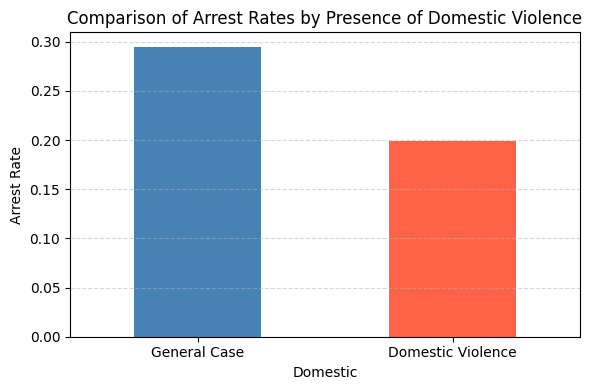

In [ ]:
# 1. Domestic 기준 그룹별 체포율 계산
arrest_rate = (
    df.groupby('Domestic')['Arrest']
    .mean()
    .rename({True: 'Domestic Violence', False: 'General Case'})
)

# 2. 시각화
plt.figure(figsize=(6, 4))
arrest_rate.plot(kind='bar', color=['steelblue', 'tomato'])

plt.title('Comparison of Arrest Rates by Presence of Domestic Violence')
plt.ylabel('Arrest Rate')
# plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
print(arrest_rate.apply(lambda x: f"{x:.2%}"))

Domestic
General Case         29.49%
Domestic Violence    19.96%
Name: Arrest, dtype: object


#### 통계적 검정
----
- Domestic: 범주형 데이터(True/False)
- Arrest: 범주형 데이터(True/False)
- **Domestic 여부와 Arrest 여부는 서로 관련이 있는가(독립인가)? -> 일반 사건과 가정폭력 사건의 체포율은 유의미하게 다르다고 할 수 있는가?**

In [ ]:
# 교차표 만들기
ct = pd.crosstab(df['Domestic'], df['Arrest'])

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(ct)

# Cramér’s V 계산 함수
def cramers_v(confusion_matrix):
    chi2_stat = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

# Cramér’s V 계산
v = cramers_v(ct)

# 결과 출력
print("📌 카이제곱 독립성 검정 결과")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"자유도: {dof}")
print(f"p-value: {p:.20f}")
print(f"Cramér’s V: {v:.4f}")

print("\n📊 교차표:")
print(ct)

📌 카이제곱 독립성 검정 결과
카이제곱 통계량: 31056.2026
자유도: 1
p-value: 0.00000000000000000000
Cramér’s V: 0.0709

📊 교차표:
Arrest      False    True 
Domestic                  
False     3789641  1585256
True       637026   158890


In [ ]:
# 강도(Cramer's V) 계산

# 교차표
confusion_matrix = np.array([[3789641, 1585256],
                             [637026, 158890]])

# Cramér’s V 계산 함수
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

v = cramers_v(confusion_matrix)
print(f"Cramér’s V: {v:.4f}")

Cramér’s V: 0.0709


- 귀무가설: 가정폭력 사건과 일반 사건의 체포율은 동일하다.
  - Domestic 여부와 Arrest는 서로 독립이다.
- 대립가설: 가정폭력 사건과 일반 사건의 체포율은 동일하지 않다.
  - Domestic 여부와 Arrest는 서로 관련이 있다.
----
- 가정폭력 사건의 체포율 20.0%
- 일반 사건의 체포율 29.5%
  - 차이 약 9.5%p로, 일반 사건보다 가정폭력 사건의 체포율이 낮다.
  - 또한 **p-value < 0.05** 기 때문에 귀무가설을 기각한다. **가정폭력 사건과 일반 사건은 체포율에 통계적으로 유의미한 차이를 보인다.**
  - 그러나 **Cramér’s V = 0.0709**로, 두 변수 간의 연관성이 매우 약한 수준이기 때문에 **통계적으로 유의미하긴 하지만, 설명력이나 영향력은 제한적**이라고 할 수 있다.

- 가정폭력 사건은 일반 사건에 비해 체포율이 약 9.5%p 낮게 나타났으며,
이는 통계적으로 유의미한 차이(p < 0.05)를 보임.
- 그러나 Cramér’s V = 0.0709로 두 변수 간의 연관성 강도는 약한 수준에 그침.
- 따라서 통계적으로 차이는 분명히 존재하지만, 변수 자체의 설명력은 크지 않음. -> 가정폭력이라는 것 속성 자체가 체포율과 연관성이 있는 것은 아니라는 것!
- 체포율이 낮은 것은 단순히 '가정폭력'이기 때문이 아니라, 가족 내 신고 지연 / 수사 협조 부족 / 사회적 눈치 등 다양한 구조적 요인들이 함께 작용했을 수 있음.
- 따라서 실제 원인을 파악하기 위해서는 사회적, 제도적 요인에 대한 추가 분석이 필요

### 가설 2
----
**가정폭력 사건의 경우, 대부분 거주지 유형 장소에서 발생할 것이다.**
  - 변수 Domestic(가정폭력 여부): 이항 범주형(True/False)
  - 변수 Location Description(사건 발생 장소 설명): 다항 범주형(171개)

#### 시각화

In [ ]:
df['Location Description'].unique()

array(['RESIDENCE', 'OTHER', 'APARTMENT', 'RESIDENCE PORCH/HALLWAY',
       'GAS STATION', 'COMMERCIAL / BUSINESS OFFICE', 'STREET', 'BANK',
       'SMALL RETAIL STORE', 'DEPARTMENT STORE', 'SIDEWALK',
       'APPLIANCE STORE', 'HOTEL/MOTEL', 'MEDICAL/DENTAL OFFICE',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY',
       'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'DAY CARE CENTER',
       'RESTAURANT', 'COLLEGE/UNIVERSITY GROUNDS',
       'SCHOOL, PUBLIC, BUILDING', 'HOSPITAL BUILDING/GROUNDS',
       'WAREHOUSE', 'FACTORY/MANUFACTURING BUILDING',
       'SCHOOL, PRIVATE, GROUNDS', 'GROCERY FOOD STORE', 'CHA APARTMENT',
       'SCHOOL, PUBLIC, GROUNDS', 'VEHICLE NON-COMMERCIAL',
       'GOVERNMENT BUILDING/PROPERTY', 'AIRPORT/AIRCRAFT',
       'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
       'POLICE FACILITY/VEH PARKING LOT', 'TAVERN/LIQUOR STORE',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE-GARAGE',
       'PARK PROPERTY', 'CHA PARKING LOT/GROUNDS', 'ABANDONED BUILDING'

In [ ]:
# Location Description의 경우 값이 너무 많음 -> 적당한 분류가 필요함

# Residential(거주지) / Commercial(상업 공간) / Public/Institutional(공공 시설)
# Transportation(교통수단 관련) / Outdoor/Open(오픈된 외부) / Other(기타)
# 맵핑해서 새 칼럼 만들기

# 171개의 Location Description을 분류하는 전체 매핑 딕셔너리
category_mapping = {
    # Residential
    'RESIDENCE': 'Residential', 'RESIDENCE PORCH/HALLWAY': 'Residential', 'APARTMENT': 'Residential',
    'HOUSE': 'Residential', 'COACH HOUSE': 'Residential', 'PORCH': 'Residential',
    'GARAGE': 'Residential', 'YARD': 'Residential', 'HALLWAY': 'Residential',
    'RESIDENCE-GARAGE': 'Residential', 'DRIVEWAY - RESIDENTIAL': 'Residential',
    'BASEMENT': 'Residential', 'STAIRWELL': 'Residential', 'ROOMING HOUSE': 'Residential',
    'RESIDENTIAL YARD (FRONT/BACK)': 'Residential', 'CHA APARTMENT': 'Residential',
    'CHA PLAY LOT': 'Residential', 'CHA HALLWAY': 'Residential', 'CHA HALLWAY/STAIRWELL/ELEVATOR': 'Residential',
    'CHA LOBBY': 'Residential', 'CHA STAIRWELL': 'Residential', 'CHA BREEZEWAY': 'Residential',
    'CHA PARKING LOT': 'Residential', 'CHA PARKING LOT/GROUNDS': 'Residential',
    'CHA GROUNDS': 'Residential', 'CHA ELEVATOR': 'Residential',

    # Commercial
    'RETAIL STORE': 'Commercial', 'SMALL RETAIL STORE': 'Commercial', 'DEPARTMENT STORE': 'Commercial',
    'RESTAURANT': 'Commercial', 'TAVERN': 'Commercial', 'LIQUOR STORE': 'Commercial',
    'TAVERN/LIQUOR STORE': 'Commercial', 'BANK': 'Commercial', 'SAVINGS AND LOAN': 'Commercial',
    'DRUG STORE': 'Commercial', 'GROCERY FOOD STORE': 'Commercial', 'CONVENIENCE STORE': 'Commercial',
    'GAS STATION': 'Commercial', 'GAS STATION DRIVE/PROP.': 'Commercial', 'AUTO': 'Commercial',
    'APPLIANCE STORE': 'Commercial',
    'MOVIE HOUSE/THEATER': 'Commercial', 'BOWLING ALLEY': 'Commercial', 'PAWN SHOP': 'Commercial',
    'CLEANING STORE': 'Commercial', 'COIN OPERATED MACHINE': 'Commercial',
    'NEWSSTAND': 'Commercial', 'POOL ROOM': 'Commercial', 'POOLROOM': 'Commercial',
    'CLEANERS/LAUNDROMAT': 'Commercial', 'GARAGE/AUTO REPAIR': 'Commercial',
    'BAR OR TAVERN': 'Commercial', 'BARBER SHOP/BEAUTY SALON': 'Commercial', 'BARBERSHOP': 'Commercial',
    'HAIR SALON': 'Commercial', 'CURRENCY EXCHANGE': 'Commercial', 'CREDIT UNION': 'Commercial',
    'LOBBY': 'Commercial', 'LOADING DOCK': 'Commercial',

    # Public/Institutional
    'SCHOOL, PRIVATE, GROUNDS': 'Public', 'SCHOOL, PUBLIC, BUILDING': 'Public',
    'SCHOOL, PRIVATE, BUILDING': 'Public', 'SCHOOL, PUBLIC, GROUNDS': 'Public',
    'SCHOOL YARD': 'Public', 'PUBLIC GRAMMAR SCHOOL': 'Public', 'PUBLIC HIGH SCHOOL': 'Public',
    'COLLEGE/UNIVERSITY GROUNDS': 'Public', 'COLLEGE/UNIVERSITY RESIDENCE HALL': 'Public',
    'DAY CARE CENTER': 'Public', 'LIBRARY': 'Public', 'HOSPITAL': 'Public',
    'HOSPITAL BUILDING/GROUNDS': 'Public', 'MEDICAL/DENTAL OFFICE': 'Public',
    'NURSING HOME': 'Public', 'NURSING HOME/RETIREMENT HOME': 'Public', 'FUNERAL PARLOR': 'Public',
    'GOVERNMENT BUILDING/PROPERTY': 'Public', 'FEDERAL BUILDING': 'Public',
    'POLICE FACILITY/VEH PARKING LOT': 'Public', 'FIRE STATION': 'Public', 'YMCA': 'Public',
    'CHURCH': 'Public', 'CHURCH PROPERTY': 'Public', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP': 'Public',
    'OFFICE': 'Public',

    # Transportation
    'PARKING LOT': 'Transportation', 'PARKING LOT/GARAGE(NON.RESID.)': 'Transportation',
    'DRIVEWAY': 'Transportation', 'HIGHWAY/EXPRESSWAY': 'Transportation',
    'VEHICLE NON-COMMERCIAL': 'Transportation', 'VEHICLE-COMMERCIAL': 'Transportation',
    'TAXICAB': 'Transportation', 'TAXI CAB': 'Transportation', 'TRUCKING TERMINAL': 'Transportation',
    'DELIVERY TRUCK': 'Transportation', 'LIVERY STAND OFFICE': 'Transportation',
    'VEHICLE - DELIVERY TRUCK': 'Transportation', 'VEHICLE - OTHER RIDE SERVICE': 'Transportation',
    'TRUCK': 'Transportation', 'DELIVERY TRUCK': 'Transportation',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA': 'Transportation',
    'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'Transportation',
    'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA': 'Transportation',
    'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA': 'Transportation',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA': 'Transportation',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA': 'Transportation',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 'Transportation',
    'AIRPORT EXTERIOR - SECURE AREA': 'Transportation',
    'AIRPORT EXTERIOR - NON-SECURE AREA': 'Transportation',
    'AIRPORT PARKING LOT': 'Transportation',
    'AIRPORT/AIRCRAFT': 'Transportation', 'AIRCRAFT': 'Transportation',
    'AIRPORT VENDING ESTABLISHMENT': 'Transportation', 'AIRPORT TRANSPORTATION SYSTEM (ATS)': 'Transportation',
    'CTA BUS': 'Transportation', 'CTA "L" TRAIN': 'Transportation', 'CTA "L" PLATFORM': 'Transportation',
    'CTA PLATFORM': 'Transportation', 'CTA STATION': 'Transportation',
    'CTA PROPERTY': 'Transportation', 'CTA GARAGE / OTHER PROPERTY': 'Transportation',
    'CTA BUS STOP': 'Transportation', 'CTA TRACKS - RIGHT OF WAY': 'Transportation',

    # Outdoor/Open
    'STREET': 'Outdoor', 'SIDEWALK': 'Outdoor', 'ALLEY': 'Outdoor', 'SEWER': 'Outdoor', 'BRIDGE': 'Outdoor',
    'PARK PROPERTY': 'Outdoor', 'FOREST PRESERVE': 'Outdoor', 'PARK': 'Outdoor',
    'RIVER': 'Outdoor', 'LAKE': 'Outdoor', 'RIVER BANK': 'Outdoor',
    'LAKEFRONT/WATERFRONT/RIVERBANK': 'Outdoor', 'CEMETARY': 'Outdoor',
    'WOODED AREA': 'Outdoor', 'VACANT LOT': 'Outdoor', 'VACANT LOT/LAND': 'Outdoor',
    'PRAIRIE': 'Outdoor', 'JUNK YARD/GARBAGE DUMP': 'Outdoor',

    # Other
    'OTHER': 'Other', 'UNKNOWN': 'Other', 'DUMPSTER': 'Other', 'VESTIBULE': 'Other',
    'CHA ELEVATOR': 'Other', 'FACTORY/MANUFACTURING BUILDING': 'Other', 'FACTORY': 'Other',
    'WAREHOUSE': 'Other', 'LOADING DOCK': 'Other', 'CONSTRUCTION SITE': 'Other',
    'ANIMAL HOSPITAL': 'Other', 'TRAILER': 'Other', 'ATM (AUTOMATIC TELLER MACHINE)': 'Other',
    'ATHLETIC CLUB': 'Other', 'LIVERY AUTO': 'Other', 'ELEVATOR': 'Other', 'NEWSSTAND': 'Other',
    'CLEANERS/LAUNDROMAT': 'Other', 'BOAT/WATERCRAFT': 'Other', 'BANQUET HALL': 'Other',
}

df['Location Category'] = df['Location Description'].map(category_mapping).fillna('Other')

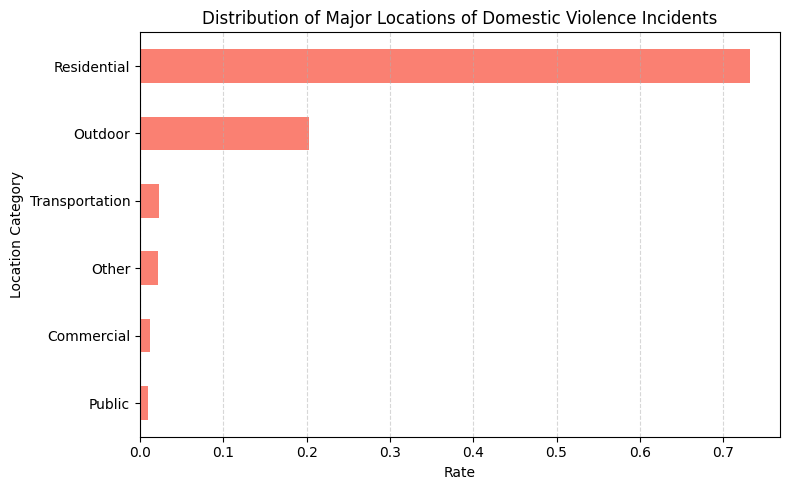

In [ ]:
# 시각화용 데이터 (가정폭력 사건 중 장소 비율)
domestic_dist = (
    df[df['Domestic'] == True]['Location Category']
    .value_counts(normalize=True)
    .sort_values(ascending=True)
)

# 시각화
plt.figure(figsize=(8, 5))
domestic_dist.plot(kind='barh', color='salmon')
plt.title('Distribution of Major Locations of Domestic Violence Incidents')
plt.xlabel('Rate')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 통계적 검정
----
- Domestic: 범주형 데이터(True/False)
- Location Description: 범주형 데이터(171개)
- **가정폭력 여부와 사건 발생 장소는 서로 관련이 있는가(독립인가)?**

In [ ]:
# 교차표 만들기
ct = pd.crosstab(df['Domestic'], df['Location Category'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(ct)

# 정확한 Cramér’s V 계산
def cramers_v(confusion_matrix):
    chi2_stat = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

# 적용
v = cramers_v(ct)

# 결과 출력
print("📌 카이제곱 독립성 검정 결과")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"자유도: {dof}")
print(f"p-value: {p:.20f}")
print(f"Cramér’s V: {v:.4f}")

print("\n📊 교차표:")
print(ct)

📌 카이제곱 독립성 검정 결과
카이제곱 통계량: 640240.3391
자유도: 5
p-value: 0.00000000000000000000
Cramér’s V: 0.3221

📊 교차표:
Location Category  Commercial   Other  Outdoor  Public  Residential  \
Domestic                                                              
False                  553579  377029  2307041  261688      1509369   
True                     9463   16900   161311    8182       582257   

Location Category  Transportation  
Domestic                           
False                      366191  
True                        17803  


- 귀무가설: 가정폭력 여부와 사건 발생 장소는 관련이 없다.
  - Domestic과 Location Category는 서로 독립이다.
- 대립가설: 가정폭력 여부와 사건 발생 장소는 관련이 있다.
  - Domestic과 Location Category는 서로 독립이 아니다.
----
- 전체 사건 중 Residential 비중은 약 **34%**이지만,
가정폭력 사건의 Residential 비중은 **73%**로 과도하게 높다.
  - 또한 **p-value < 0.05** 기 때문에 귀무가설을 기각한다.
  - 그러나 **Cramér’s V = 0.3221**로, 두 변수 간의 연관성이 중간 수준이기 때문에 의미 있는 차이가 존재함을 알 수 있다.

결론: **가정폭력 사건은 일반 사건과 비교해 거주지에서 유의미하게 많이 발생한다.**

- 가정폭력 여부와 사건 발생 장소 간에는 통계적으로 유의미한 관련이 있으며,
특히 **거주지(Residential)**에서 가정폭력 사건이 일반 사건보다 현저히 높은 비율로 발생하는 경향이 확인됨.
- 카이제곱 검정 결과(p < 0.001) 뿐 아니라, Cramér’s V = 0.3221로 두 변수 간의 연관성 강도도 중간 수준 이상으로 나타나,
단순한 통계적 유의성에 그치지 않고, 실질적으로도 중요한 공간적 패턴 차이를 보여줌.
- 이는 가정폭력 문제를 대응할 때, 거주지 중심의 정책 개입 및 감지 체계가 핵심적임을 뒷받침하는 통계적 근거가 됨.

### 가설 3
----
**경찰 관할 구역에 따라 범죄 유형 분포에 차이가 있을 것이다.**
- 변수 District(사건 발생 경찰 구역 번호): 다항 범주형(26개) -> 수치형 데이터지만 의미는 카테고리
- 변수 Primary Type(주요 범죄 유형): 다항 범주형(35개)

#### 시각화

In [ ]:
df['Primary Type'].nunique()

35

In [ ]:
df['Primary Type'].unique()

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM', 'DOMESTIC VIOLENCE',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [ ]:
# 범죄 유형이 너무 많아 역시나 큰 카테고리로 구분

# Primary Type을 범죄군 기준으로 묶기 위한 매핑 딕셔너리 정의
primary_type_category_map = {

    # 폭력범죄
    'BATTERY': 'Violent Crime',
    'ASSAULT': 'Violent Crime',
    'HOMICIDE': 'Violent Crime',
    'CRIM SEXUAL ASSAULT': 'Violent Crime',
    'STALKING': 'Violent Crime',
    'KIDNAPPING': 'Violent Crime',
    'INTIMIDATION': 'Violent Crime',
    'DOMESTIC VIOLENCE': 'Violent Crime',
    'HUMAN TRAFFICKING': 'Violent Crime',

    # 성범죄
    'SEX OFFENSE': 'Sex Crime',
    'OBSCENITY': 'Sex Crime',
    'PUBLIC INDECENCY': 'Sex Crime',
    'PROSTITUTION': 'Sex Crime',

    # 재산범죄
    'THEFT': 'Property Crime',
    'BURGLARY': 'Property Crime',
    'ROBBERY': 'Property Crime',
    'MOTOR VEHICLE THEFT': 'Property Crime',
    'DECEPTIVE PRACTICE': 'Property Crime',
    'CRIMINAL DAMAGE': 'Property Crime',

    # 마약/기타 유사
    'NARCOTICS': 'Drug Offense',
    'OTHER NARCOTIC VIOLATION': 'Drug Offense',
    'LIQUOR LAW VIOLATION': 'Drug Offense',

    # 무기/공공질서
    'WEAPONS VIOLATION': 'Public Order',
    'PUBLIC PEACE VIOLATION': 'Public Order',
    'INTERFERENCE WITH PUBLIC OFFICER': 'Public Order',
    'CONCEALED CARRY LICENSE VIOLATION': 'Public Order',

    # 기타
    'OTHER OFFENSE': 'Other',
    'OFFENSE INVOLVING CHILDREN': 'Other',
    'NON-CRIMINAL': 'Other',
    'NON - CRIMINAL': 'Other',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 'Other',
    'RITUALISM': 'Other',
    'GAMBLING': 'Other',
    'ARSON': 'Other',
    'CRIMINAL TRESPASS': 'Other',
}

df['Crime Category'] = df['Primary Type'].map(primary_type_category_map).fillna('Other')

In [ ]:
df['District'].dtypes

dtype('O')

In [ ]:
df['District'].unique()

array([4.0, 9.0, 14.0, 25.0, 22.0, 10.0, 5.0, 18.0, 11.0, 20.0, 8.0, 7.0,
       1.0, 16.0, 15.0, 3.0, 6.0, 2.0, 19.0, 12.0, 24.0, 17.0, 31.0, 21.0,
       '10.0', '7.0', '5.0', '11.0', '1.0', '3.0', '6.0', '18.0', '15.0',
       '9.0', '25.0', '12.0', '14.0', '8.0', '17.0', '2.0', '16.0',
       '20.0', '19.0', '4.0', '24.0', '22.0', 'unknown', '31.0', 23.0,
       13.0], dtype=object)

In [ ]:
# 1. 'unknown'이 아닌 값들만 숫자로 변환
df.loc[df['District'] != 'unknown', 'District'] = df.loc[df['District'] != 'unknown', 'District'].astype(int)

# 2. 전체 타입을 통일: 나머지는 그대로 두되, 전체 컬럼 타입 object 유지
# 또는 숫자+문자 섞였다는 전제가 확실하다면 카테고리 처리도 고려 가능

# 3. 변환된 결과 확인
print(df['District'].unique())
print(df['District'].dtype)

[4 9 14 25 22 10 5 18 11 20 8 7 1 16 15 3 6 2 19 12 24 17 31 21 'unknown'
 23 13]
object


In [ ]:
# 히트맵용 데이터프레임 필터링 (숫자 District만)
df_heatmap = df[df['District'] != 'unknown'].copy()
df_heatmap['District'] = df_heatmap['District'].astype(int)

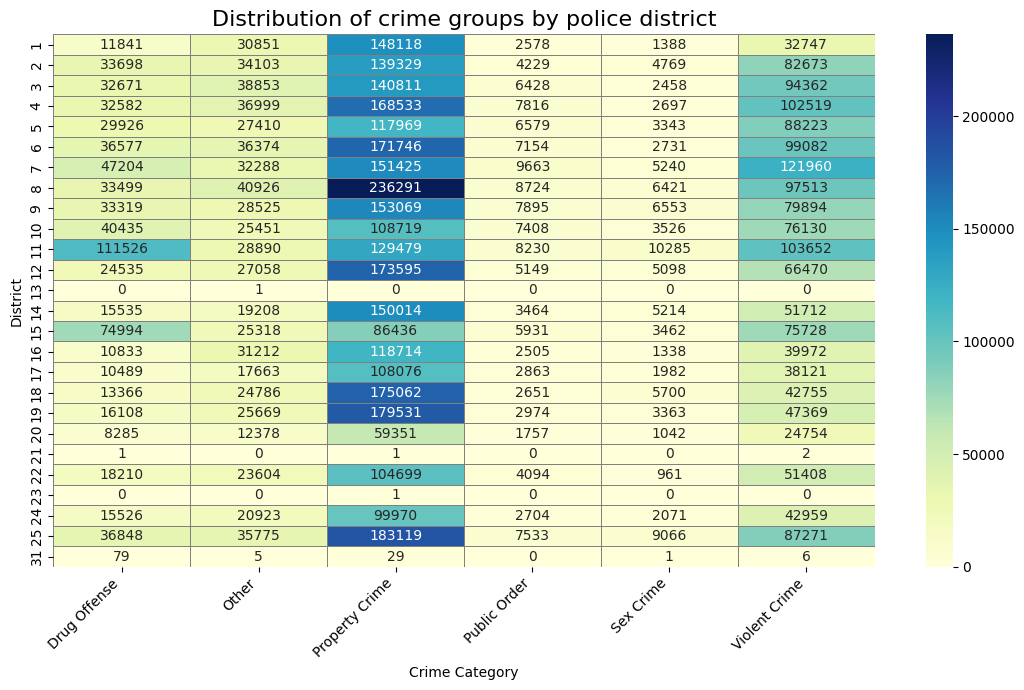

In [ ]:
# 교차표 만들기
pivot_table = pd.crosstab(df_heatmap['District'], df_heatmap['Crime Category'])

# 히트맵 시각화
plt.figure(figsize=(11, 7))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5, linecolor='gray', annot=True, fmt='d')
plt.title("Distribution of crime groups by police district", fontsize=16)
plt.xlabel("Crime Category")
plt.ylabel("District")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# 경로 설정
gdf_districts = gpd.read_file("/content/drive/MyDrive/final_pj/PoliceDistrict.shp")

In [ ]:
print(gdf_districts.crs)

None


In [ ]:
# CRS가 None이라서 좌표계 수동으로 지정
gdf_districts.crs = "EPSG:4326"

In [ ]:
# 사건 데이터를 GeoDataFrame으로 변환

# 'unknown' 제거 및 float형으로 변환
df_filtered = df[(df['Latitude'] != 'unknown') & (df['Longitude'] != 'unknown')].copy()
df_filtered['Latitude'] = df_filtered['Latitude'].astype(float)
df_filtered['Longitude'] = df_filtered['Longitude'].astype(float)

# geometry 컬럼 생성
df_filtered['geometry'] = df_filtered.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# GeoDataFrame으로 변환
geo_df = gpd.GeoDataFrame(df_filtered, geometry='geometry', crs='EPSG:4326')

In [ ]:
print("경찰 District CRS:", gdf_districts.crs)
print("사건 데이터 CRS:", geo_df.crs)

경찰 District CRS: EPSG:4326
사건 데이터 CRS: EPSG:4326


In [ ]:
# 공간 조인
joined = gpd.sjoin(geo_df, gdf_districts, how='left', predicate='within')

In [ ]:
print(gdf_districts.columns)
print(joined.columns)

Index(['DIST_LABEL', 'DIST_NUM', 'geometry'], dtype='object')
Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',
       'Latitude', 'Longitude', 'Location', 'Community Area Code', 'Hour',
       'Daytime', 'Location Category', 'Time Category', 'Time Period',
       'Crime Category', 'geometry', 'index_right', 'DIST_LABEL', 'DIST_NUM'],
      dtype='object')


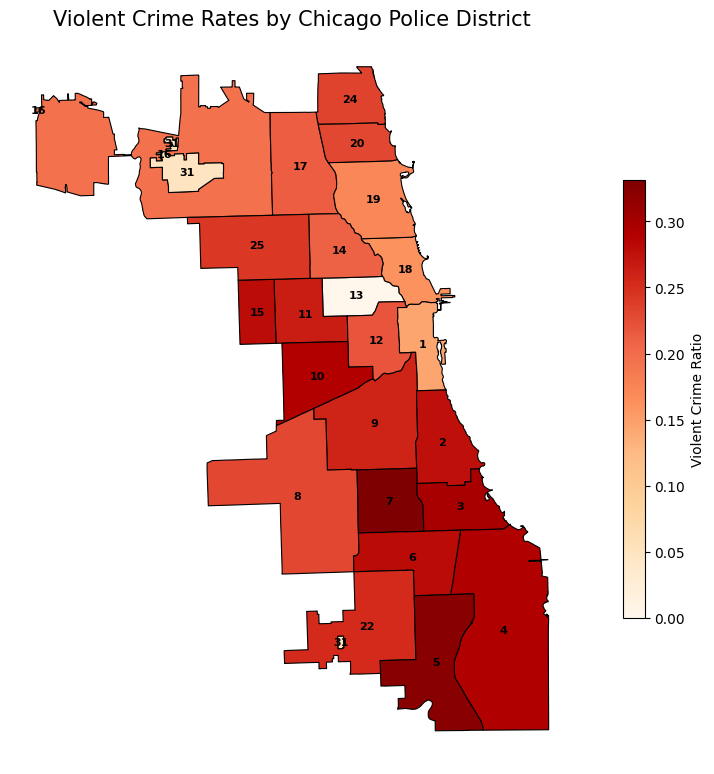

In [ ]:
# 지도 시각화 -> District별 범죄군 비율 보여주기
# 1. 폭력범죄(Violent Crime)

# 전체 사건 수 (District 기준)
total_by_district = joined.groupby("District").size()

# 폭력범죄 사건 수
violent_by_district = joined[joined["Crime Category"] == "Violent Crime"].groupby("District").size()

# 비율 계산
violent_ratio = (violent_by_district / total_by_district).fillna(0).reset_index()
violent_ratio.columns = ["District", "violent_ratio"]

# DIST_NUM과 District 타입 맞추기
gdf_districts["DIST_NUM"] = gdf_districts["DIST_NUM"].astype(int)

# GeoDataFrame에 병합
gdf_plot = gdf_districts.merge(violent_ratio, left_on="DIST_NUM", right_on="District", how="left")

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 8))

gdf_plot.plot(
    column="violent_ratio",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "Violent Crime Ratio", "shrink": 0.6},
    ax=ax
)

# 2. District 번호 라벨 표시
for idx, row in gdf_plot.iterrows():
    # 구역 중심 좌표 계산 (geometry의 중심)
    if row["geometry"] and not row["geometry"].is_empty:
        centroid = row["geometry"].centroid
        plt.text(
            centroid.x, centroid.y,
            str(row["DIST_NUM"]),
            fontsize=8,
            fontweight='bold',
            color='black',
            ha='center',
            va='center'
        )

# 3. 기타 설정
ax.set_title("Violent Crime Rates by Chicago Police District", fontsize=15)
ax.axis("off")
plt.tight_layout()
plt.show()

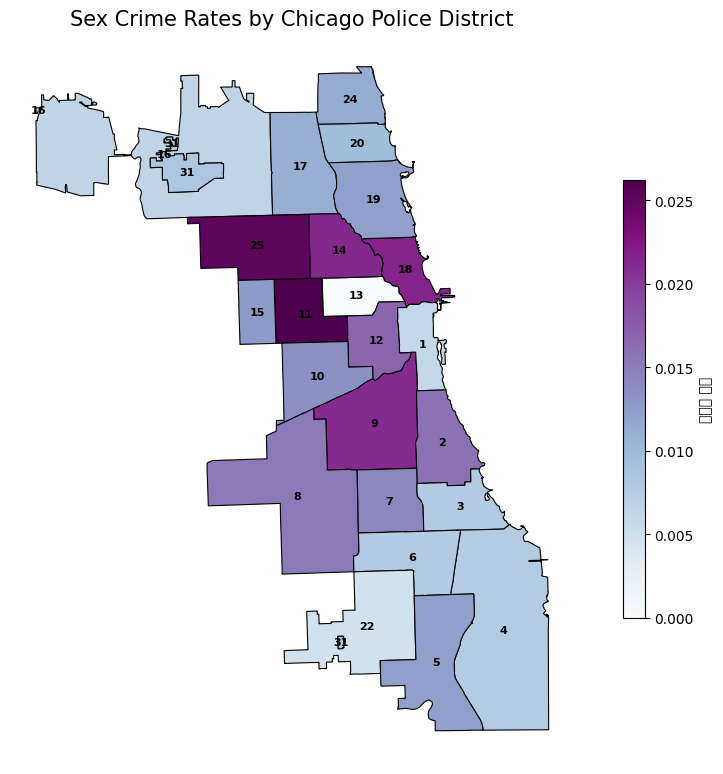

In [ ]:
# 지도 시각화 -> District별 범죄군 비율 보여주기
# 2. 성범죄(Sex Crime)

# 1. 성범죄 비율 계산
total_by_district = joined.groupby("District").size()
sexcrime_by_district = joined[joined["Crime Category"] == "Sex Crime"].groupby("District").size()

sexcrime_ratio = (sexcrime_by_district / total_by_district).fillna(0).reset_index()
sexcrime_ratio.columns = ["District", "sexcrime_ratio"]

# 2. District 정수형 통일
gdf_districts["DIST_NUM"] = gdf_districts["DIST_NUM"].astype(int)

# 3. GeoDataFrame 병합
gdf_plot = gdf_districts.merge(sexcrime_ratio, left_on="DIST_NUM", right_on="District", how="left")

# 4. 시각화
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
gdf_plot.plot(
    column="sexcrime_ratio",
    cmap="BuPu",  # 성범죄 → 보라색 계열
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "성범죄 비율", "shrink": 0.6},
    ax=ax
)

# 5. District 번호 텍스트 표시
for idx, row in gdf_plot.iterrows():
    if row["geometry"] and not row["geometry"].is_empty:
        centroid = row["geometry"].centroid
        plt.text(
            centroid.x, centroid.y,
            str(row["DIST_NUM"]),
            fontsize=8,
            fontweight='bold',
            color='black',
            ha='center',
            va='center'
        )

ax.set_title("Sex Crime Rates by Chicago Police District", fontsize=15)
ax.axis("off")
plt.tight_layout()
plt.show()

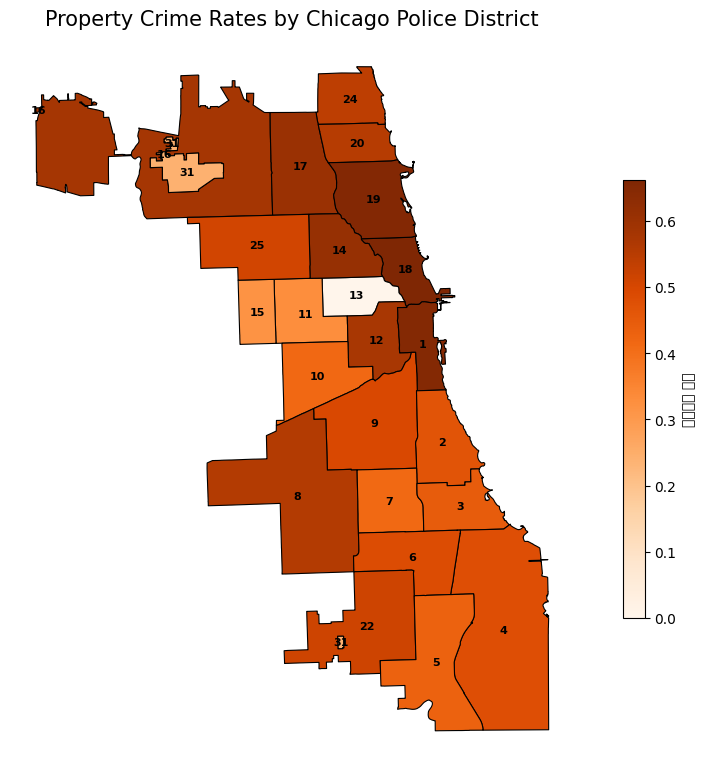

In [ ]:
# 지도 시각화 -> District별 범죄군 비율 보여주기
# 3. 재산범죄(Property Crime)

# 1. 재산범죄 비율 계산
total_by_district = joined.groupby("District").size()
property_by_district = joined[joined["Crime Category"] == "Property Crime"].groupby("District").size()

property_ratio = (property_by_district / total_by_district).fillna(0).reset_index()
property_ratio.columns = ["District", "property_ratio"]

# 2. District 정수형 통일
gdf_districts["DIST_NUM"] = gdf_districts["DIST_NUM"].astype(int)

# 3. 병합
gdf_plot = gdf_districts.merge(property_ratio, left_on="DIST_NUM", right_on="District", how="left")

# 4. 시각화
fig, ax = plt.subplots(figsize=(10, 8))
gdf_plot.plot(
    column="property_ratio",
    cmap="Oranges",  # 재산범죄 → 주황 계열
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "재산범죄 비율", "shrink": 0.6},
    ax=ax
)

# 5. District 번호 표시
for idx, row in gdf_plot.iterrows():
    if row["geometry"] and not row["geometry"].is_empty:
        centroid = row["geometry"].centroid
        plt.text(
            centroid.x, centroid.y,
            str(row["DIST_NUM"]),
            fontsize=8,
            fontweight='bold',
            color='black',
            ha='center',
            va='center'
        )

ax.set_title("Property Crime Rates by Chicago Police District", fontsize=15)
ax.axis("off")
plt.tight_layout()
plt.show()

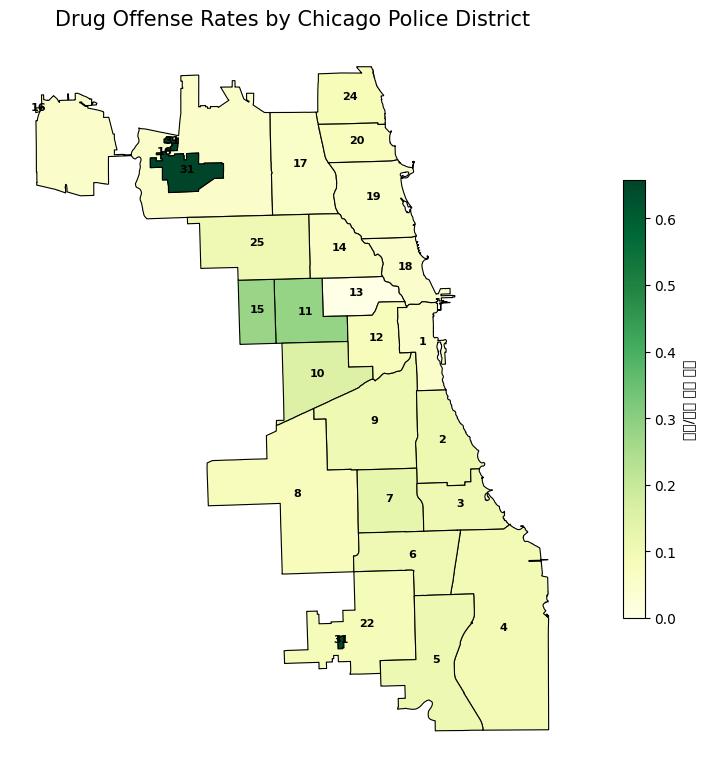

In [ ]:
# 지도 시각화 -> District별 범죄군 비율 보여주기
# 4. 마약/기타 유사 범죄(Drug Offense)

# 마약/기타 유사 범죄 비율 계산
total_by_district = joined.groupby("District").size()
drug_by_district = joined[joined["Crime Category"] == "Drug Offense"].groupby("District").size()

drug_ratio = (drug_by_district / total_by_district).fillna(0).reset_index()
drug_ratio.columns = ["District", "drug_ratio"]

gdf_districts["DIST_NUM"] = gdf_districts["DIST_NUM"].astype(int)

gdf_plot = gdf_districts.merge(drug_ratio, left_on="DIST_NUM", right_on="District", how="left")

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))
gdf_plot.plot(
    column="drug_ratio",
    cmap="YlGn",  # 마약 → 연녹색 계열
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "마약/유사 범죄 비율", "shrink": 0.6},
    ax=ax
)

for idx, row in gdf_plot.iterrows():
    if row["geometry"] and not row["geometry"].is_empty:
        centroid = row["geometry"].centroid
        plt.text(centroid.x, centroid.y, str(row["DIST_NUM"]), fontsize=8, fontweight='bold', ha='center')

ax.set_title("Drug Offense Rates by Chicago Police District", fontsize=15)
ax.axis("off")
plt.tight_layout()
plt.show()

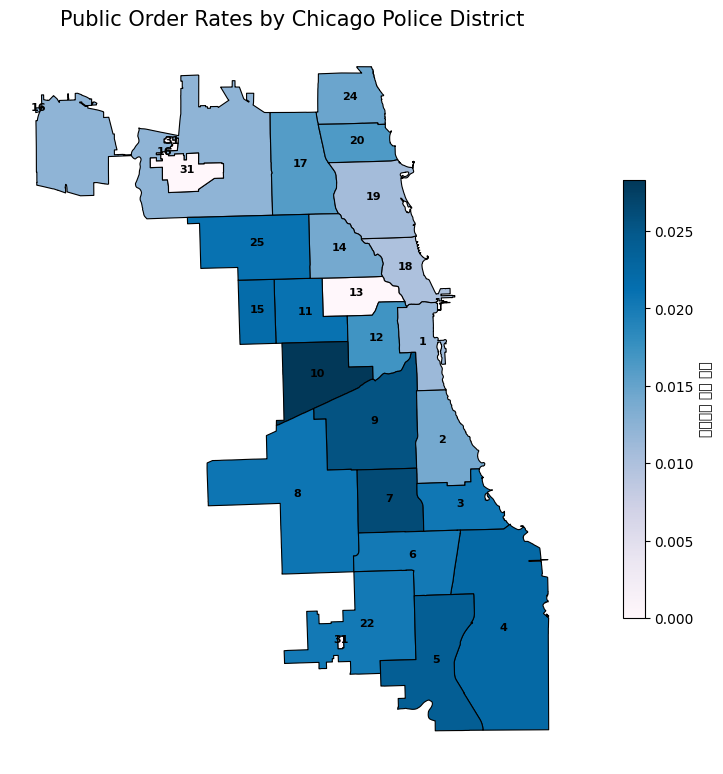

In [ ]:
# 지도 시각화 -> District별 범죄군 비율 보여주기
# 5. 공공질서 범죄(Public Order)

# 공공질서 범죄 비율 계산
total_by_district = joined.groupby("District").size()
order_by_district = joined[joined["Crime Category"] == "Public Order"].groupby("District").size()

order_ratio = (order_by_district / total_by_district).fillna(0).reset_index()
order_ratio.columns = ["District", "order_ratio"]

gdf_plot = gdf_districts.merge(order_ratio, left_on="DIST_NUM", right_on="District", how="left")

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))
gdf_plot.plot(
    column="order_ratio",
    cmap="PuBu",  # 공공질서 → 파랑 계열
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "공공질서 범죄 비율", "shrink": 0.6},
    ax=ax
)

for idx, row in gdf_plot.iterrows():
    if row["geometry"] and not row["geometry"].is_empty:
        centroid = row["geometry"].centroid
        plt.text(centroid.x, centroid.y, str(row["DIST_NUM"]), fontsize=8, fontweight='bold', ha='center')

ax.set_title("Public Order Rates by Chicago Police District", fontsize=15)
ax.axis("off")
plt.tight_layout()
plt.show()

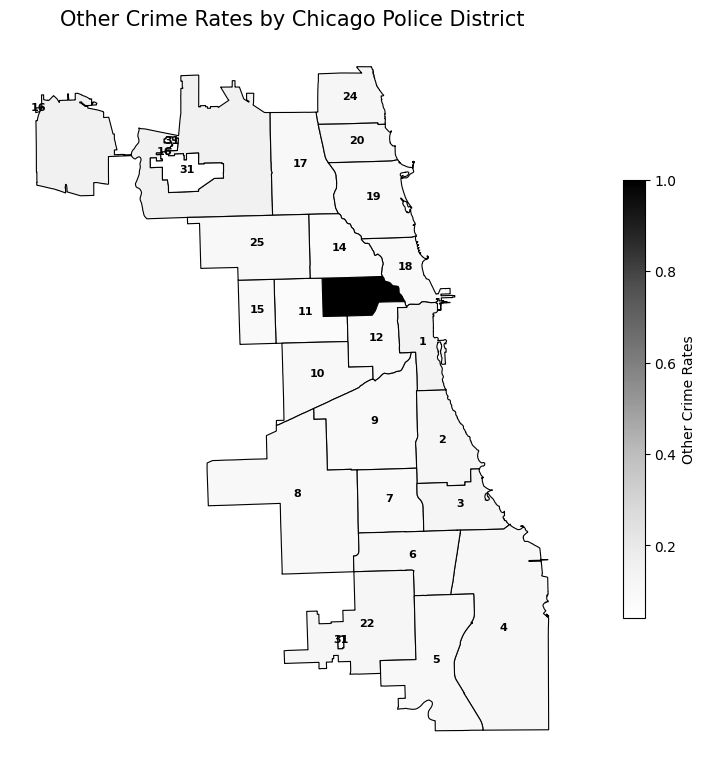

In [ ]:
# 지도 시각화 -> District별 범죄군 비율 보여주기
# 6. 기타 범죄(Other)

# 기타 범죄 비율 계산
total_by_district = joined.groupby("District").size()
other_by_district = joined[joined["Crime Category"] == "Other"].groupby("District").size()

other_ratio = (other_by_district / total_by_district).fillna(0).reset_index()
other_ratio.columns = ["District", "other_ratio"]

gdf_plot = gdf_districts.merge(other_ratio, left_on="DIST_NUM", right_on="District", how="left")

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))
gdf_plot.plot(
    column="other_ratio",
    cmap="Greys",  # 기타 → 회색 계열
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "Other Crime Rates", "shrink": 0.6},
    ax=ax
)

for idx, row in gdf_plot.iterrows():
    if row["geometry"] and not row["geometry"].is_empty:
        centroid = row["geometry"].centroid
        plt.text(centroid.x, centroid.y, str(row["DIST_NUM"]), fontsize=8, fontweight='bold', ha='center')

ax.set_title("Other Crime Rates by Chicago Police District", fontsize=15)
ax.axis("off")
plt.tight_layout()
plt.show()

- 사실상 District 13, 21, 23, 31은 데이터 수가 너무 적어서 의미가 없음
- 모든 구역에서 재산 범죄(Property Crime)의 빈도수가 가장 높음
- 그 다음으로는 구역 11, 15를 제외한 구역에서 가장 발생 빈도수가 높은 범죄는 폭력범죄(Violent Crime)
  - 구역 11, 15에서 두 번째로 많이 발생한 범죄는 마약 관련 범죄(Drug Offense)

- 11th District - Harrison
  - Humboldt Park, West Garfield Park, North Lawndale, East Garfield Park, Near West Side, Austin, Garfield Park Conservatory, Garfield Park and Field House.
- 15th District - Austin
  - Chicago West Illinois Secretary of State Facility, Chicago Water Pumping Station, and Rockne Stadium.

- 데이터 출처
- https://www.chicagopolice.org/police-districts/find-your-district/

- 시카고 불법 마약 거래 미국 통틀어 가장 심각한 위기로 평가
- 출처: https://chicagokoreatimes.com/139483/2024/05/10/%EC%A2%85%ED%95%A9%EB%89%B4%EC%8A%A4/dea-%EC%8B%9C%EC%B9%B4%EA%B3%A0-%EB%B6%88%EB%B2%95-%EB%A7%88%EC%95%BD-%EA%B1%B0%EB%9E%98-%EB%AF%B8%EA%B5%AD-%ED%86%B5%ED%8B%80%EC%96%B4-%EA%B0%80%EC%9E%A5-%EC%8B%AC%EA%B0%81%ED%95%9C-%EC%9C%84/?utm_source=chatgpt.com

- 美시카고, 올들어 6개월간 1천930명 총맞아…하루 10명 이상
- 출처: https://www.yna.co.kr/view/AKR20160702010500009

- 시카고 여행 시 주의사항
- 출처: https://news.mofa.go.kr/enewspaper/articleview.php?master=&aid=3390&sid=24&mvid=1021

#### 통계적 검정
----
- District: 범주형 데이터(26개)
- Primary Type: 범주형 데이터(35개)
- **경찰 관할 구역과 범죄 유형 간에는 통계적으로 유의한 관련이 있는가?**

In [ ]:
# 교차표 생성
contingency_table = pd.crosstab(df_heatmap['District'], df_heatmap['Crime Category'])

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Cramér’s V 계산 함수
def cramers_v(confusion_matrix):
    chi2_stat = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

# Cramér’s V 계산
v = cramers_v(contingency_table)

# 결과 출력
print("📌 카이제곱 독립성 검정 결과")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"자유도: {dof}")
print(f"p-value: {p:.4f}")
print(f"Cramér’s V: {v:.4f}")

# 교차표 출력
print("\n📊 교차표:")
display(contingency_table)

📌 카이제곱 독립성 검정 결과
카이제곱 통계량: 439609.8716
자유도: 125
p-value: 0.0000
Cramér’s V: 0.1194

📊 교차표:


Crime Category,Drug Offense,Other,Property Crime,Public Order,Sex Crime,Violent Crime
District,,,,,,
1,11841,30851,148118,2578,1388,32747
2,33698,34103,139329,4229,4769,82673
3,32671,38853,140811,6428,2458,94362
4,32582,36999,168533,7816,2697,102519
5,29926,27410,117969,6579,3343,88223
6,36577,36374,171746,7154,2731,99082
7,47204,32288,151425,9663,5240,121960
8,33499,40926,236291,8724,6421,97513
9,33319,28525,153069,7895,6553,79894


- 귀무가설 (H₀): 경찰 관할 구역과 범죄 유형 간에는 통계적으로 유의한 관련이 없다.
- 대립가설 (H₁): 경찰 관할 구역과 범죄 유형 간에는 통계적으로 유의한 관련이 있다.
  - **p-value < 0.05**기 때문에 **귀무가설 기각: 관할 구역에 따라 범죄 유형 분포가 다르다!**
  - 그러나 **Cramér’s V = 0.1194**기 때문에 **연관성 강도는 약한 수준**이라고 볼 수 있다.

### 가설 4
----
**FBI 범죄 코드로 분류된 범죄군마다 체포율에 차이가 있을 것이다.**
- 변수 FBI Code(FBI 범죄 분류 코드 - Primary Type보다 더 상위 유형): 다항 범주형(26개)
- 변수 Arrest(체포 여부): 이항 범주형(True/False)

#### 시각화

In [ ]:
df['FBI Code'].unique()

array(['06', '26', '20', '02', '07', '17', '11', '10', '08B', '05', '15',
       '12', '24', '18', '19', '16', '22', '04B', '14', '08A', '09',
       '01A', '04A', '03', '13', '01B'], dtype=object)

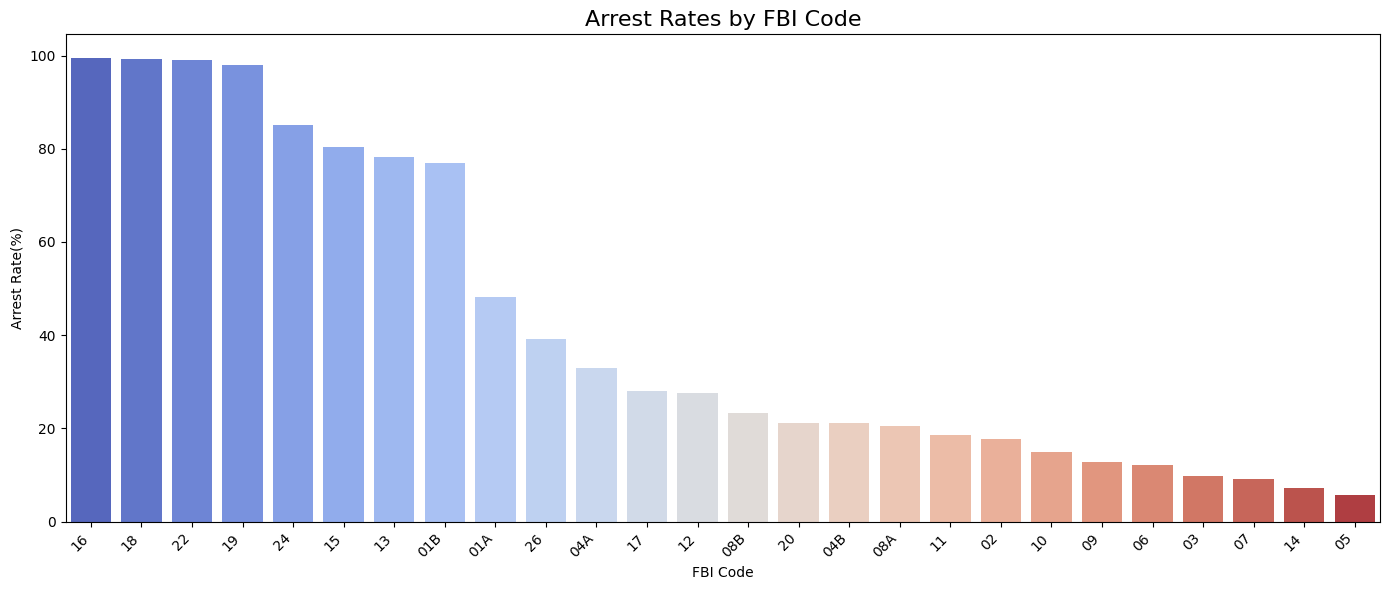

In [ ]:
# FBI 코드별 체포율 계산 (백분율로 변환)
fbi_arrest_rate = (
    df.groupby('FBI Code')['Arrest']
    .mean()
    .mul(100)  # 0~1 -> 0~100
    .reset_index()
    .sort_values(by='Arrest', ascending=False)
)

# 시각화
plt.figure(figsize=(14, 6))
sns.barplot(data=fbi_arrest_rate, x='FBI Code', y='Arrest', palette='coolwarm')

plt.xticks(rotation=45, ha='right')
plt.title('Arrest Rates by FBI Code', fontsize=16)
plt.xlabel('FBI Code')
plt.ylabel('Arrest Rate(%)')
plt.tight_layout()
plt.show()

In [ ]:
fbi_arrest_rate.reset_index(drop=True)

,FBI Code,Arrest
0,16,99.576116
1,18,99.347603
2,22,99.068693
3,19,98.001836
4,24,85.041495
5,15,80.366522
6,13,78.335890
7,01B,76.923077
8,01A,48.268740
9,26,39.191615


In [ ]:
# FBI 코드별 Primary Type과 Description의 최빈값 확인
fbi_primary_mode = (
    df.groupby('FBI Code')['Primary Type']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)

fbi_description_mode = (
    df.groupby('FBI Code')['Description']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)

# 두 개를 합쳐서 하나의 DataFrame으로 구성
fbi_mapping = pd.concat([fbi_primary_mode, fbi_description_mode], axis=1).reset_index()
fbi_mapping.columns = ['FBI Code', 'Primary Type (mode)', 'Description (mode)']
fbi_mapping

,FBI Code,Primary Type (mode),Description (mode)
0,01A,HOMICIDE,FIRST DEGREE MURDER
1,01B,HOMICIDE,RECKLESS HOMICIDE
2,02,CRIM SEXUAL ASSAULT,NON-AGGRAVATED
3,03,ROBBERY,ARMED: HANDGUN
4,04A,ASSAULT,AGGRAVATED: HANDGUN
5,04B,BATTERY,AGGRAVATED: OTHER DANG WEAPON
6,05,BURGLARY,FORCIBLE ENTRY
7,06,THEFT,$500 AND UNDER
8,07,MOTOR VEHICLE THEFT,AUTOMOBILE
9,08A,ASSAULT,SIMPLE


- 체포율 50% 이상인 범죄
  - FBI Code 16(공공장소에서 성매매 호객 행위): 99.58%
  - FBI Code 18(30g 이하의 대마초 소지): 99.35%
  - FBI Code 22(미성년자의 음주 행위): 99.07%
  - FBI Code 19(도박): 98.00%
  - FBI Code 24(난폭 행동 등 공공질서 위반): 85.04%
  - FBI Code 15(불법 권총 소지): 80.37%
  - FBI Code 13(도난 물품 소유/거래): 78.34%
  - FBI Code 01B(과실치사): 76.92%
  ----
  대체로 체포율이 높은 범죄들은 현장 단속이 가능하고, 수사 기간이 크게 길지 않은 범죄 위주

- 체포율 50% 미만인 범죄
  - FBI Code 01A(계획적인 1급 살인): 48.27%
  - FBI Code 26(협박 전화):	39.19%
  - FBI Code 04A(권총을 이용한 가중 폭행): 32.86%
  - FBI Code 17(성추행 등 성범죄): 28.08%
  - FBI Code 12(횡령): 27.56%
  - FBI Code 08B(단순 상해): 23.26%
  - FBI Code 20(아동 학대): 21.16%
  - FBI Code 04B(기타 무기를 이용한 가중 폭행): 21.09%
  - FBI Code 08A(단순 폭행): 20.53%
  - FBI Code 11(신용카드 사기): 18.55%
  - FBI Code 02(강제력이 없는 성적 접촉): 17.71%
  - FBI Code 10(위조): 14.94%
  - FBI Code 09(방화): 12.79%
  - FBI Code 06($500 이하의 소액 절도): 12.10%
  - FBI Code 03(권총 무장 강도): 9.77%
  - FBI Code 07(차량 절도): 9.12%
  - FBI Code 14(차량 손괴): 7.12%
  - FBI Code 05(강제 침입 절도): 5.73%
  ----
  대체로 체포율이 낮은 범죄들은 범죄 발생 직후 현장 체포가 어렵고, 수사 난이도가 높음

In [ ]:
# 체포율이 낮은 범죄들에 대해서 공통점을 조금 더 파고들어보자!
# 시간대 비교

# 1. 문자열을 datetime으로 한 번에 변환 (이미 datetime이면 생략 가능)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # datetime 변환

# 2. 시(hour) 추출
df['Hour'] = df['Date'].dt.hour

# 3. 벡터화된 조건문으로 낮/밤 구분
df['Daytime'] = np.where((df['Hour'] < 6) | (df['Hour'] >= 18), 'Night', 'Day')

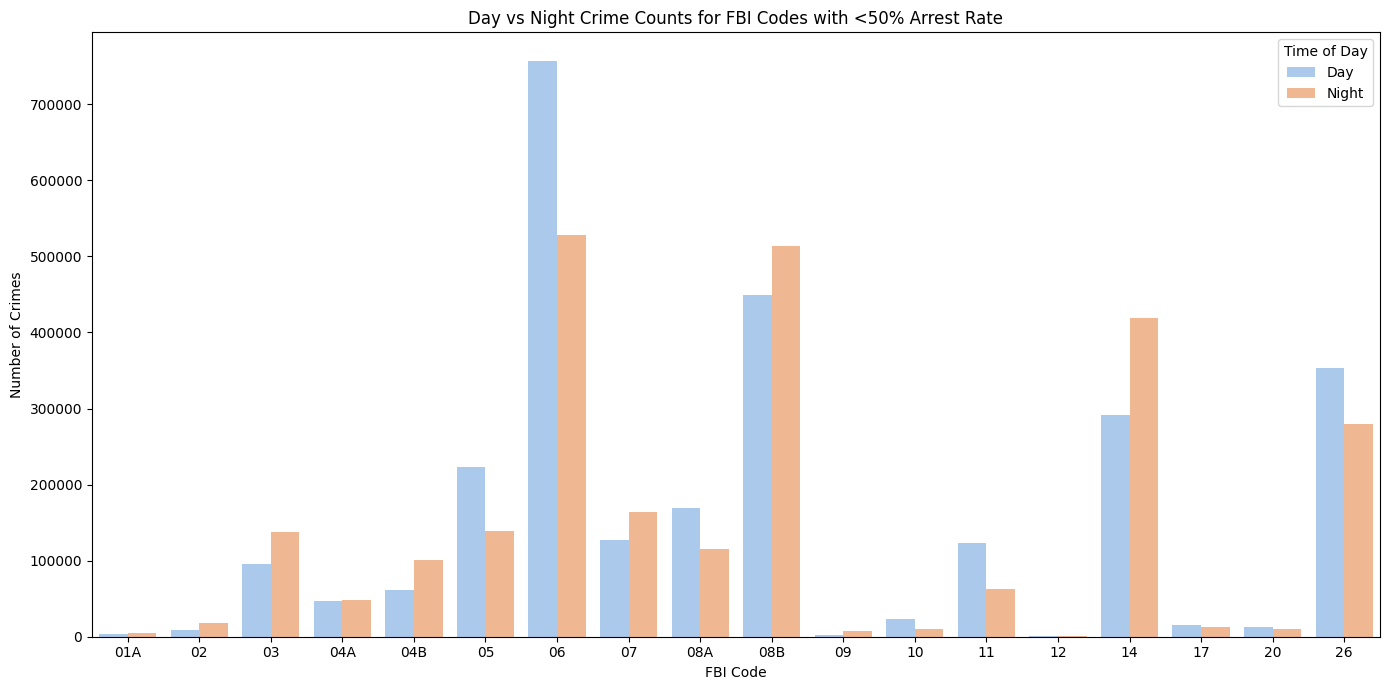

In [ ]:
# 1. FBI Code별 체포율 계산
arrest_rate = df.groupby('FBI Code')['Arrest'].mean().reset_index()
arrest_rate.columns = ['FBI Code', 'Arrest Rate']

# 2. 체포율 50% 미만인 코드만 추출
low_arrest_codes = arrest_rate[arrest_rate['Arrest Rate'] < 0.5]['FBI Code'].tolist()

# 3. 원본에서 해당 FBI Code만 필터링
low_arrest_df = df[df['FBI Code'].isin(low_arrest_codes)]

# 4. 낮/밤 기준 발생 건수 집계
daytime_counts = (
    low_arrest_df.groupby(['FBI Code', 'Daytime'])
    .size()
    .reset_index(name='Count')
)

# 5. 시각화
plt.figure(figsize=(14, 7))
sns.barplot(data=daytime_counts, x='FBI Code', y='Count', hue='Daytime', palette='pastel')
plt.title('Day vs Night Crime Counts for FBI Codes with <50% Arrest Rate')
plt.xlabel('FBI Code')
plt.ylabel('Number of Crimes')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

- 인사이트 정리
  - 전반적인 범죄 수는 낮에 더 많음
  - 08B(단순 상해), 07(차량 절도), 03(권총 무장 강도), 04B(기타 무기를 이용한 가중 폭행)는 밤에 더 많이 발생 -> 폭력성과 관련된 범죄는 야간에 많이 발생
  - 낮에 많이 일어난다고 해서 체포율이 더 높거나 낮지는 않음. 06은 낮에 많이 발생하나 체포율이 12.1%로 낮음

  => 체포율 50% 미만인 범죄 중 다수는 낮에 많이 발생하지만 **일부 범죄군은 야간 집중 경향이 뚜렷.** 이는 범죄의 성격과 시간대 간 연관성을 보여주는 시각적 증거로, 이후 **정책적 대응(예: 야간 순찰 강화, 조명 개선 등)에 활용될 수 있음.**

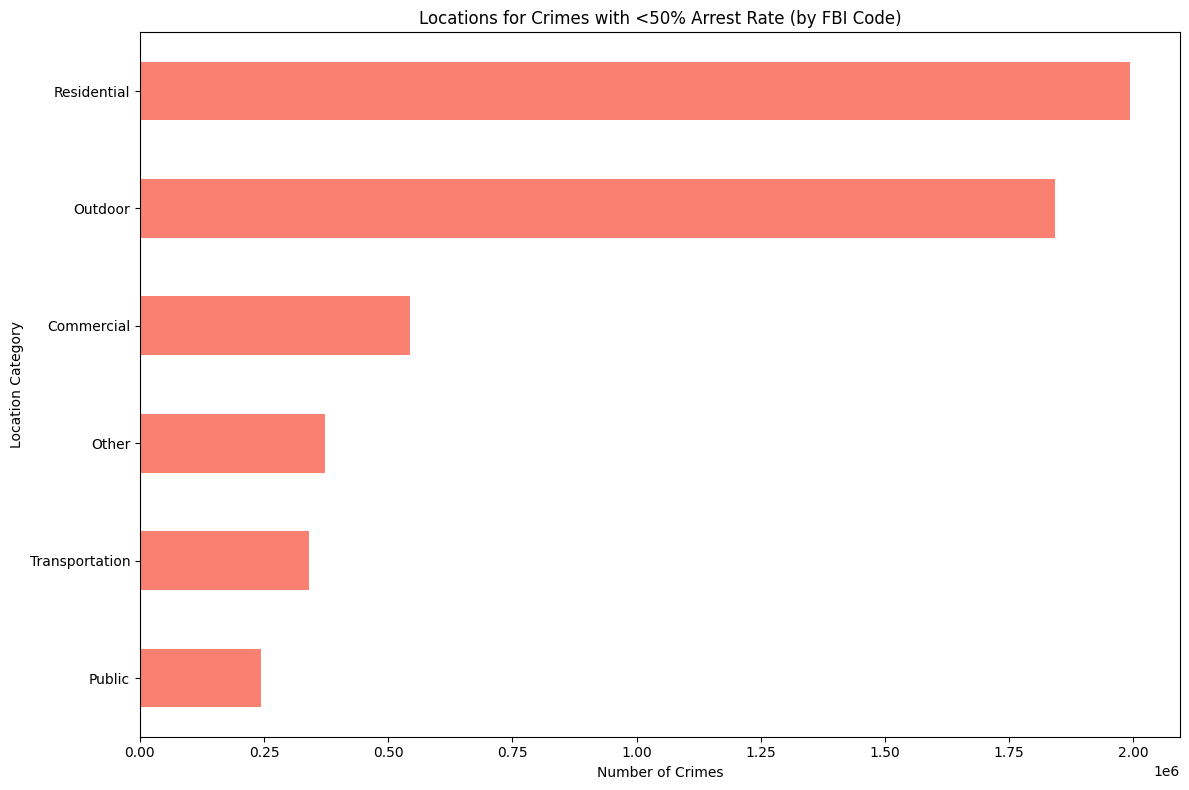

In [ ]:
# 체포율이 낮은 범죄들에 대해서 공통점을 조금 더 파고들어보자!
# 장소 비교

# 체포율 50% 미만인 FBI Code 추출
low_arrest_codes = (
    df.groupby('FBI Code')['Arrest']
    .mean()
    .reset_index()
    .query('Arrest < 0.5')['FBI Code']
    .tolist()
)

# 해당 FBI Code에 해당하는 행만 필터링
df_low_arrest = df[df['FBI Code'].isin(low_arrest_codes)]

# 장소별 빈도수 계산
location_counts = df_low_arrest['Location Category'].value_counts().head(20)

# 시각화
plt.figure(figsize=(12, 8))
location_counts.sort_values().plot(kind='barh', color='salmon')
plt.title('Locations for Crimes with <50% Arrest Rate (by FBI Code)')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Category')
plt.tight_layout()
plt.show()

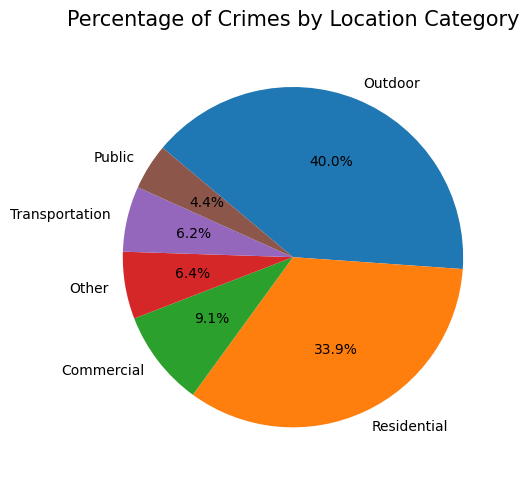

In [ ]:
# Location Category별 사건 수 계산
location_counts = df['Location Category'].value_counts()

# 파이차트 시각화
plt.figure(figsize=(5, 5))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title('Percentage of Crimes by Location Category', fontsize=15)
plt.axis('equal')  # 원형 유지
plt.tight_layout()
plt.show()

- 인사이트 정리
  - 주거지, 야외 장소에서의 발생 수가 가장 많음
  - 전체 범죄로 봐도 주거지, 야외 장소는 큰 비중을 차지하고 있음.
  ----
  => 체포율 50% 미만인 범죄뿐만 아니라 전체적으로도 주거지, 야외 장소에서 범죄가 많이 발생하는 만큼 **주거지를 중심으로 한 조기 개입, 신고 시스템 강화, 사회적 안전망 확대 및 외부 공간에 CCTV, 가로등, 순찰 강화 등 범죄 예방을 위한 시스템 집중 도입이 필요함.**

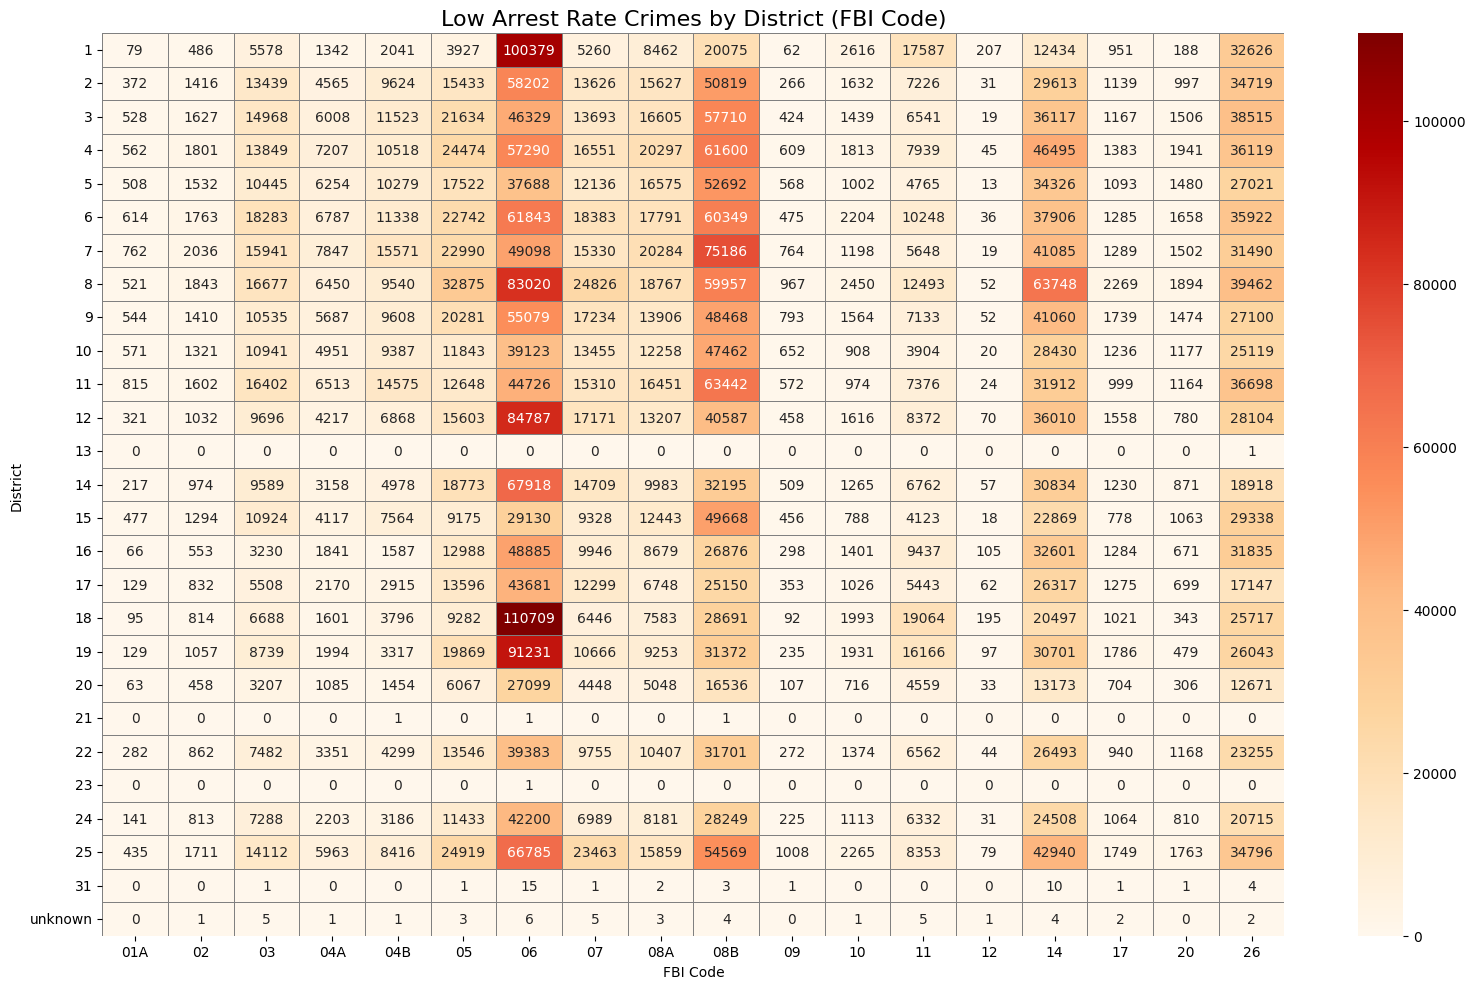

In [ ]:
# 체포율이 낮은 범죄들에 대해서 공통점을 조금 더 파고들어보자!
# District 비교

# 'unknown'이 아닌 값들만 숫자로 변환
df.loc[df['District'] != 'unknown', 'District'] = df.loc[df['District'] != 'unknown', 'District'].astype(int)

# FBI Code별 체포율 계산
arrest_rate_by_fbi = (
    df.groupby('FBI Code')['Arrest']
    .mean()
    .reset_index()
    .rename(columns={'Arrest': 'Arrest Rate'})
)

# 체포율 50% 미만인 FBI 코드만 추출
low_arrest_fbi_codes = arrest_rate_by_fbi[arrest_rate_by_fbi['Arrest Rate'] < 0.5]['FBI Code']

# 해당 FBI 코드들만 필터링
low_arrest_df = df[df['FBI Code'].isin(low_arrest_fbi_codes)]

# District x FBI Code 교차표 생성
heatmap_data = pd.crosstab(low_arrest_df['District'], low_arrest_df['FBI Code'])

# 히트맵 시각화
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='OrRd', linewidths=0.5, linecolor='gray', annot=True, fmt='d')
plt.title("Low Arrest Rate Crimes by District (FBI Code)", fontsize=16)
plt.xlabel("FBI Code")
plt.ylabel("District")
plt.tight_layout()
plt.show()

- 인사이트 정리
  - 체포율이 50% 미만인 범죄 중 대부분의 District에서 가장 많이 발생하는 범죄: 07(소액 절도)
  - 체포율이 낮은 범죄가 특정 District에 몰려있는 것은 아닌지 확인해보았으나, 딱히 그렇지는 않았음.

#### 통계적 검정
----
- FBI Code: 범주형 데이터(26개)
- Arrest: 범주형 데이터(True/False)
- **FBI Code는 체포율에 유의미한 설명력을 가지는가?**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 로지스틱 회귀 (Arrest ~ FBI Code)
df['FBI Code'] = df['FBI Code'].astype(str)
df['Arrest'] = df['Arrest'].astype(int)

import statsmodels.formula.api as smf

model = smf.logit(formula='Arrest ~ C(Q("FBI Code"))', data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.383790
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Arrest   No. Observations:              6170813
Model:                          Logit   Df Residuals:                  6170787
Method:                           MLE   Df Model:                           25
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.3554
Time:                        05:18:01   Log-Likelihood:            -2.3683e+06
converged:                       True   LL-Null:                   -3.6743e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0693      0.022     -3.141      0.002      -0.113   

- 귀무가설 (H₀): FBI Code는 체포 여부에 유의미한 설명력을 갖지 않는다.
- 대립가설 (H₁): FBI Code는 체포 여부에 유의미한 설명력을 가진다.
  - **p-value < 0.05**기 때문에, **귀무가설을 기각한다. FBI Code는 체포 여부에 통계적으로 유의미한 설명력을 가진다.**
  - 또한 **McFadden’s Pseudo R²: 0.3554**기 때문에, **설명력이 매우 강하다**고 할 수 있다.
  - 체포율은 범죄 유형에 따라 차이가 있으며, 실제 체포율 분석 결과와 회귀계수 방향성이 대부분 일치하여, 모델의 해석력이 강한 점도 확인되었다.

### 가설 5
---
**마약 관련 범죄는 주간보다 야간에 더 많이 일어났을 것이다. 또한, 주거지 유형의 장소에서 더 많이 발생했을 것이다.**
- 변수 Primary Type(주요 범죄 유형): 다항 범주형(35개)
- 변수 Date(사건 발생 날짜 및 시간): 이항 범주형(시간대로 주간/야간 구분 예정)
- 변수 Location Category(사건 발생 장소 카테고리): 다항 범주형(6개)

#### 시각화

In [ ]:
df_h = df.copy()

# Date 칼럼이 AM으로 끝나는 조건과 그렇지 않은 조건을 가진 행들을 두 개의 데이터프레임으로 분리
cond = df_h['Date'].str[-2:] == 'AM'
df_ham = df_h[cond]
df_ham['Hour'] = df_ham['Date'].str[11:13].astype('int')

df_hpm = df_h[~cond]
df_hpm['Hour'] = df_hpm['Date'].str[11:13].astype('int')


# 24시간제로 바꾸기
def convert_am(x) :
  if x == 12 :
    return 0
  else :
    return x

def convert_pm(x) :
  if x == 12 :
    return x
  else :
    return x + 12

# 만든 함수를 각각의 데이터프레임에 넣기
df_ham['Hour'] = df_ham['Hour'].apply(convert_am)
df_hpm['Hour'] = df_hpm['Hour'].apply(convert_pm)

# 시간 순으로 재정렬
df_ham.sort_values(by='Hour', inplace=True)
df_hpm.sort_values(by='Hour', inplace=True)

# 별도의 데이터프레임으로 저장
df_t = pd.concat([df_ham, df_hpm])

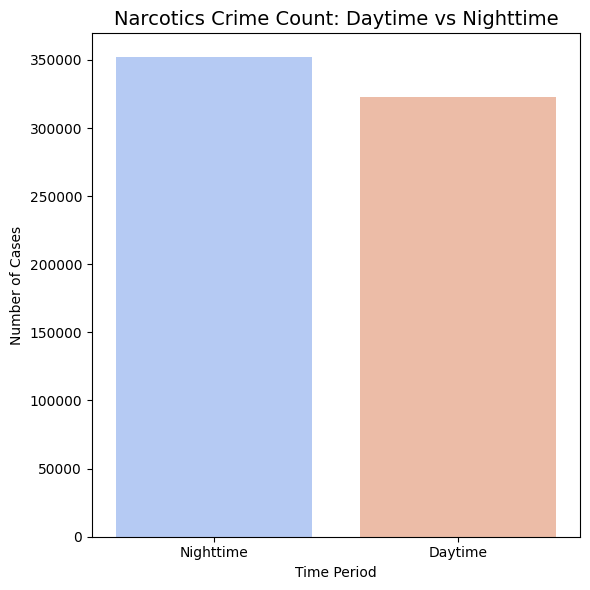

In [ ]:
# 1. 주간/야간 구분 컬럼 추가
def day_or_night(hour):
    if 6 <= hour <= 17:
        return 'Daytime'
    else:
        return 'Nighttime'

df_t['Time Period'] = df_t['Hour'].apply(day_or_night)

# 2. 마약 관련 범죄만 필터링
narcotic_types = ['NARCOTICS', 'OTHER NARCOTIC VIOLATION']
df_narcotics = df_t[df_t['Primary Type'].isin(narcotic_types)]

# 3. 주간/야간별 건수 계산
count_by_time = df_narcotics['Time Period'].value_counts().reset_index()
count_by_time.columns = ['Time Period', 'Count']

# 4. 시각화
plt.figure(figsize=(6, 6))
sns.barplot(x='Time Period', y='Count', data=count_by_time, palette='coolwarm')
plt.title('Narcotics Crime Count: Daytime vs Nighttime', fontsize=14)
plt.ylabel('Number of Cases')
plt.xlabel('Time Period')
plt.tight_layout()
plt.show()

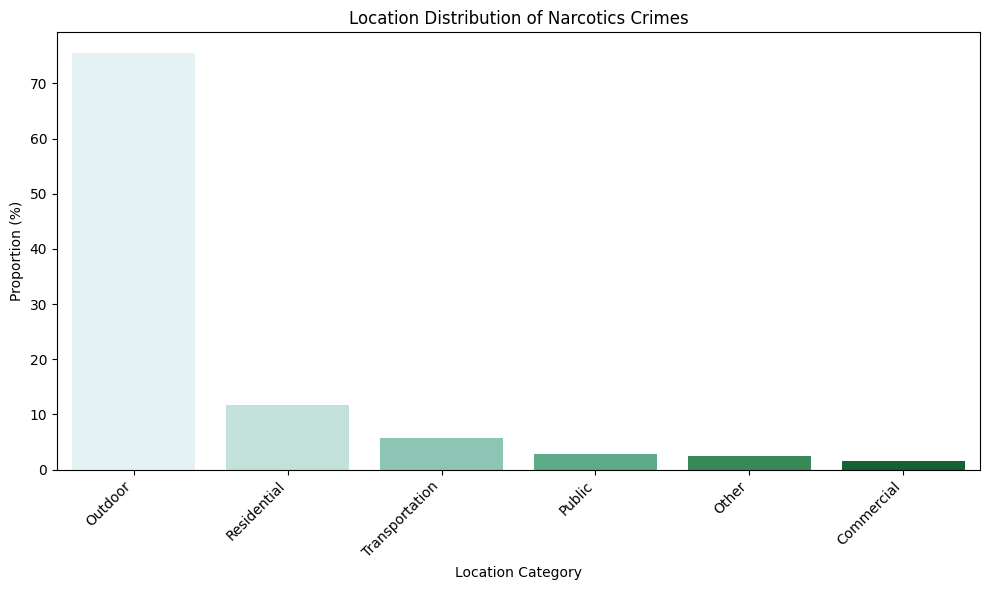

In [ ]:
# Location Category별 비율 계산
location_counts = df_narcotics['Location Category'].value_counts(normalize=True).reset_index()
location_counts.columns = ['Location Category', 'Proportion']
location_counts['Proportion (%)'] = location_counts['Proportion'] * 100

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=location_counts, x='Location Category', y='Proportion (%)', palette='BuGn')
plt.title("Location Distribution of Narcotics Crimes")
plt.xlabel("Location Category")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- 인사이트 정리
  - 먀악 사건은 야간 발생 수가 훨씬 더 높고, 대부분 'Outdoor'에서 발생함.
    - 시간대 -> 단속을 회피하려는 전략일 수 있음.
    - Outdoor -> 마약 노상 거래 가능성이 높으며, 감시 사각지대를 활용하려는 행태가 보임.
  ---
  => 야간 순찰 강화 및 특정 외부 장소 모니터링 강화가 필요할 듯.

#### 통계적 검정
----
- Primary Type: 범주형 데이터(26개)
- Date: 범주형 데이터(True/False)
- Location Category: 범주형 데이터(6개)
- **주간과 야간의 마약 범죄 발생 건수에 유의미한 차이가 있는가?**

In [ ]:
# 날짜만 추출
df_narcotics['Date Only'] = pd.to_datetime(df_narcotics['Date']).dt.date

# 날짜 & 주야간별 사건 수 집계
daily_counts = df_narcotics.groupby(['Date Only', 'Time Period']).size().unstack().fillna(0)

# 각각 벡터 추출
day_counts = daily_counts['Daytime'].values
night_counts = daily_counts['Nighttime'].values

In [ ]:
from scipy.stats import shapiro

stat_day, p_day = shapiro(day_counts)
stat_night, p_night = shapiro(night_counts)

print(f"📊 Daytime 정규성 p-value: {p_day:.6f}")
print(f"📊 Nighttime 정규성 p-value: {p_night:.6f}")

📊 Daytime 정규성 p-value: 0.000000
📊 Nighttime 정규성 p-value: 0.000000


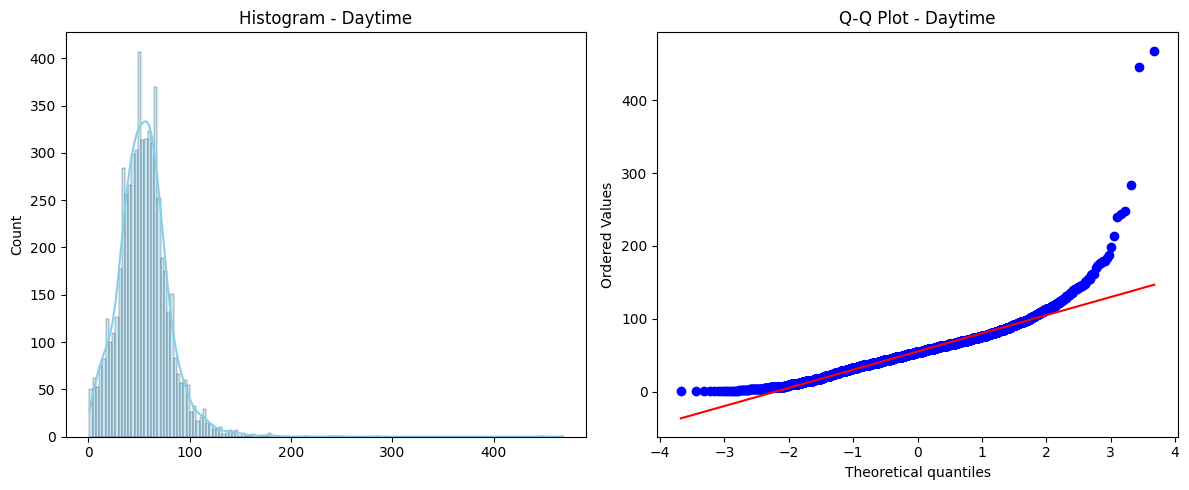

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(day_counts, kde=True, color='skyblue')
plt.title("Histogram - Daytime")

plt.subplot(1, 2, 2)
stats.probplot(day_counts, dist="norm", plot=plt)
plt.title("Q-Q Plot - Daytime")

plt.tight_layout()
plt.show()

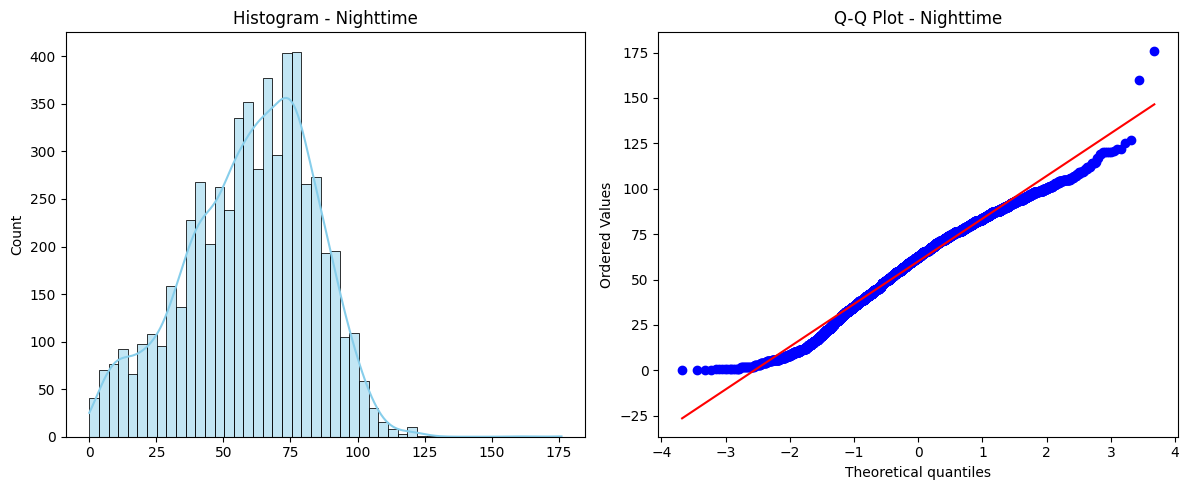

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(night_counts, kde=True, color='skyblue')
plt.title("Histogram - Nighttime")

plt.subplot(1, 2, 2)
stats.probplot(night_counts, dist="norm", plot=plt)
plt.title("Q-Q Plot - Nighttime")

plt.tight_layout()
plt.show()

In [ ]:
# 정규성 가정을 만족하지 않기 때문에, 비모수 검정인 Mann-Whitney U 검정 (Wilcoxon rank-sum test) 사용
from scipy.stats import mannwhitneyu, norm

# 주간/야간 일별 사건 수
day_counts = df_narcotics[df_narcotics['Time Period'] == 'Daytime'].groupby('Date').size()
night_counts = df_narcotics[df_narcotics['Time Period'] == 'Nighttime'].groupby('Date').size()

# Mann-Whitney U Test
stat, p = mannwhitneyu(day_counts, night_counts, alternative='two-sided')

# 효과 크기 r 계산
n1 = len(day_counts)
n2 = len(night_counts)
u = stat
mean_u = n1 * n2 / 2
std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
z = (u - mean_u) / std_u
r = abs(z) / np.sqrt(n1 + n2)

# 출력
print(f"📊 Mann-Whitney U 통계량: {stat}")
print(f"📊 p-value: {p:.6f}")
print(f"📐 효과 크기 r: {r:.4f}")

# 해석
if p < 0.05:
    print("✅ 주간과 야간의 마약 범죄 발생 건수에 통계적으로 유의미한 차이가 있음")
    if r < 0.1:
        print("🔹 효과 크기: 매우 작음")
    elif r < 0.3:
        print("🔹 효과 크기: 작음")
    elif r < 0.5:
        print("🔹 효과 크기: 중간")
    else:
        print("🔹 효과 크기: 큼")
else:
    print("❌ 유의미한 차이는 없음")

📊 Mann-Whitney U 통계량: 42898706340.5
📊 p-value: 0.000000
📐 효과 크기 r: 0.0063
✅ 주간과 야간의 마약 범죄 발생 건수에 통계적으로 유의미한 차이가 있음
🔹 효과 크기: 매우 작음


- 귀무가설 (H₀): 주간과 야간의 마약 범죄 발생 건수에 통계적으로 유의미한 차이가 없다.
- 대립가설 (H₁): 주간과 야간의 마약 범죄 발생 건수에 통계적으로 유의미한 차이가 있다.
  - **p-value < 0.05**기 때문에, 귀무가설을 기각한다. **주간과 야간 사이에 마약 범죄 발생량의 분포가 통계적으로 유의하게 다르다.**
  - 그러나 **효과 크기 r = 0.0063**으로, 실질적인 분포 차이는 거의 없는 수준이었다.

- 이는 데이터 양이 충분히 많을 경우, 작은 차이도 p < 0.05로 유의하게 나타날 수 있음을 보여주는 사례.
- 따라서 해석 시 통계적 유의성과 실질적 영향력을 구분하여 판단할 필요가 있음.
- p-value만 보면 ‘야간에 마약 범죄가 더 많다’는 결론을 쉽게 내릴 수 있지만,
실제 효과 크기 r이 0.0063으로 극히 작다는 점에서
단순한 유의성보다는 실제 차이의 의미와 크기를 함께 해석하는 것이 중요함을 보여줌.

In [ ]:
from scipy.stats import chisquare

# 장소 유형별 빈도
location_counts = df_narcotics['Location Category'].value_counts()

# 기대값: 균등하게 발생했다고 가정할 경우
expected = [location_counts.sum() / len(location_counts)] * len(location_counts)

# 카이제곱 적합도 검정
chi2_stat, p_value = chisquare(location_counts.values, f_exp=expected)

print(f"Chi-squared Statistic: {chi2_stat:.2f}, p-value: {p_value:.10f}")

Chi-squared Statistic: 1708594.75, p-value: 0.0000000000


- 귀무가설 (H₀):
마약 범죄 내부에서 장소 유형 간 발생 빈도의 차이가 유의미하지 않다.
→ 즉, 마약 범죄가 특정 장소에서 더 자주 발생하지 않는다. 다른 범죄와 비교해 특정 장소에 편중되어 있지 않다.
- 대립가설 (H₁):
마약 범죄 내부에서 장소 유형 간 발생 빈도의 차이가 유의미하다.
→ 즉, 마약 범죄는 특정 장소 유형에서 더 자주 발생한다.
장소와 범죄 유형 간에 통계적으로 유의미한 관련이 있다.
  - p-value < 0.05
  - **귀무가설 기각: 마약 범죄는 특정 장소 유형에서 더 자주 발생한다.
장소와 범죄 유형 간에 통계적으로 유의미한 관련이 있다.**
  - **또한, 데이터 시각화를 통해 주로 Outdoor 카테고리의 장소에서 많이 발생하는 경향성을 확인했다.**
  - 그리고 단일 변수의 분포 분석이기 때문에, Cramér’s V처럼 변수 간 관계의 강도를 측정할 수는 없다.

## 6. 머신러닝 전 데이터 전처리
----
* 결측치 처리 **[완료]**
* 중복행 제거 **[완료]**
----
* (1) 목표 변수 정의 -> 마약 범죄 + 강력범죄 **[완료]**
* (2) 사용하지 않을 칼럼 제거 **[완료]**
* (3) 데이터 타입 변환 필요한 칼럼 처리 **[완료]**
* (4) 이상치 처리 **[완료]**
* (5) 비슷한 칼럼 간 다중공선성 여부 확인하기 **[완료]**
* (6) 최종 데이터 타입 변환 및 범주형 변수 인코딩 -> 바이너리 인코딩 **[완료]**
* (7) 수치형 데이터 스케일링(정규화/표준화) **[완료]**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/data_visualization.csv")

In [ ]:
# (1) 목표 변수 정의 : 마약범죄 예측

# 마약 관련 범죄로 간주할 범주 리스트
narcotics_types = {'NARCOTICS', 'OTHER NARCOTIC VIOLATION'}

# 메모리 최적화를 위해 numpy의 vectorized 연산 사용
# is_narcotics 컬럼 생성: Primary Type이 마약 관련이면 1, 아니면 0
df['is_narcotics'] = np.where(df['Primary Type'].isin(narcotics_types), 1, 0).astype(np.uint8)

In [ ]:
# 데이터 불균형 확인 -> 마약범죄가 아닌 경우(0)가 더 많음
df['is_narcotics'].value_counts()

,count
is_narcotics,
0,5496146
1,674667


In [ ]:
# (2) 사용하지 않을 칼럼 제거 : 'ID', 'Case Number', 'Block', 'Latitude', 'Longitude', 'Location' + 시간 관련 칼럼 + 범죄 유형 관련 칼럼
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',
       'Latitude', 'Longitude', 'Location', 'Community Area Code',
       'is_narcotics'],
      dtype='object')

In [ ]:
# 드랍할 칼럼 리스트
drop_columns = [
    'ID', 'Case Number', 'Block', 'Latitude', 'Longitude', 'Location',
    'Date', 'Year', # 시간 관련 칼럼
    'Primary Type', 'Description',  'IUCR', 'FBI Code'  # 정답을 맞추는 데 너무 직접적인 정보를 담은 칼럼(넣으면 정확도 1.0 나옴)
]

# 칼럼 드랍
df = df.drop(columns=drop_columns)

print(df.columns)

Index(['Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'X Coordinate', 'Y Coordinate', 'Community Area Code',
       'is_narcotics'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170813 entries, 0 to 6170812
Data columns (total 10 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Location Description  object
 1   Arrest                bool  
 2   Domestic              bool  
 3   Beat                  int64 
 4   District              object
 5   Ward                  object
 6   X Coordinate          object
 7   Y Coordinate          object
 8   Community Area Code   int64 
 9   is_narcotics          uint8 
dtypes: bool(2), int64(2), object(5), uint8(1)
memory usage: 347.2+ MB


In [ ]:
# (3) 데이터 타입 변환 진행
# 'unknown' 값 포함하고 있는 칼럼 중 'unknown' 삭제 후 데이터 타입 변환이 필요한 칼럼 -> District, Ward, X Coordinate, Y Coordinate
def find_columns_with_unknown_fast(df):
    cols_with_unknown = []
    for col in df.columns:
        # 일단 dtype이 object(문자형)인 칼럼만 확인
        if df[col].dtype == object:
            # 고비용 연산 없이 유니크 값만 뽑아서 확인
            unique_vals = df[col].unique()
            if 'unknown' in unique_vals:
                cols_with_unknown.append(col)
    return cols_with_unknown
cols_with_unknown = find_columns_with_unknown_fast(df)
print(cols_with_unknown)

['Location Description', 'District', 'Ward', 'X Coordinate', 'Y Coordinate']


In [ ]:
def clean_and_convert_specific_cols(df):
    # 변환할 칼럼과 원하는 타입 매핑
    col_dtype_map = {
        'District': 'float',
        'Ward': 'float',
        'X Coordinate': 'float',
        'Y Coordinate': 'float'
    }

    for col, dtype in col_dtype_map.items():
        # 1. 'unknown' 값 제거 (== 'unknown'인 행 자체를 삭제)
        df = df[df[col] != 'unknown']

        # 2. 데이터 타입 변환
        df[col] = df[col].astype(dtype)

    return df

df = clean_and_convert_specific_cols(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6167824 entries, 0 to 6170812
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Location Description  object 
 1   Arrest                bool   
 2   Domestic              bool   
 3   Beat                  int64  
 4   District              float64
 5   Ward                  float64
 6   X Coordinate          float64
 7   Y Coordinate          float64
 8   Community Area Code   int64  
 9   is_narcotics          uint8  
dtypes: bool(2), float64(4), int64(2), object(1), uint8(1)
memory usage: 394.1+ MB


In [ ]:
df['Ward'] = df['Ward'].astype('int')
df['District'] = df['District'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6167824 entries, 0 to 6170812
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Location Description  object 
 1   Arrest                bool   
 2   Domestic              bool   
 3   Beat                  int64  
 4   District              int64  
 5   Ward                  int64  
 6   X Coordinate          float64
 7   Y Coordinate          float64
 8   Community Area Code   int64  
 9   is_narcotics          uint8  
dtypes: bool(2), float64(2), int64(4), object(1), uint8(1)
memory usage: 394.1+ MB


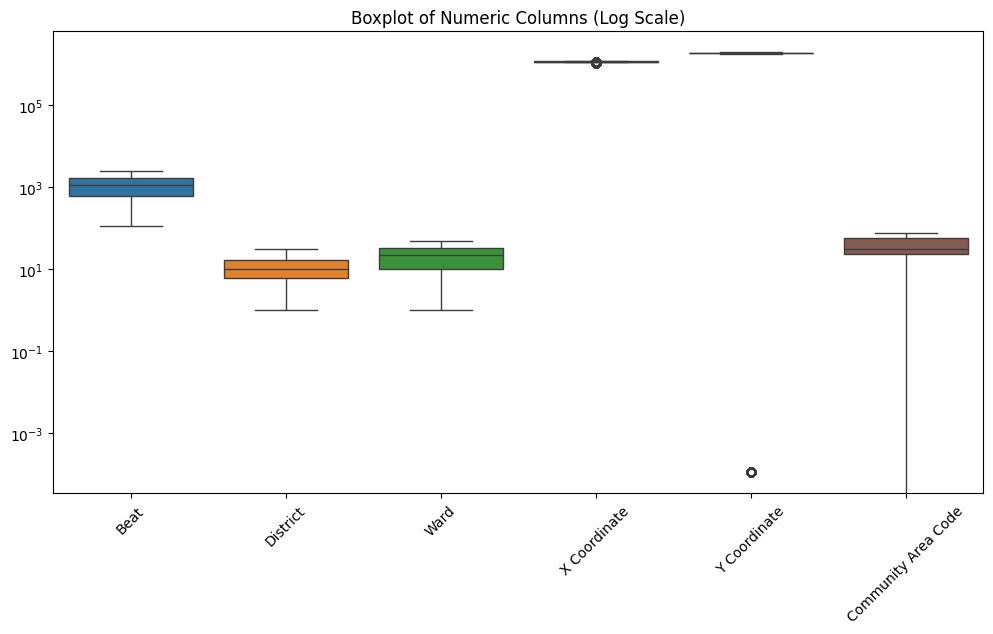

In [ ]:
# (4) 수치형 데이터타입의 칼럼 전부 박스플롯 그려서 이상치 확인하기

def boxplot_numeric_cols_logscale(df):
    # 1. 수치형 컬럼만 고르기 (is_narcotics 제외)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'is_narcotics']

    # 2. 박스플롯 그리기
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[numeric_cols])

    # 3. y축 로그 스케일 적용
    plt.yscale('log')
    plt.title("Boxplot of Numeric Columns (Log Scale)")
    plt.xticks(rotation=45)  # x축 라벨 45도 꺾기
    plt.show()

boxplot_numeric_cols_logscale(df)

In [ ]:
print(df['Community Area Code'].describe())
print(df['Community Area Code'].value_counts().sort_index())

# Community Area Code의 경우 값이 1번부터 77번까지 분포되어 있어야 하나, 0이라는 이상치가 존재

count    6.167824e+06
mean     3.758541e+01
std      2.153327e+01
min      0.000000e+00
25%      2.300000e+01
50%      3.200000e+01
75%      5.800000e+01
max      7.700000e+01
Name: Community Area Code, dtype: float64
Community Area Code
0       305
1     95963
2     75811
3     93180
4     43525
      ...  
73    72256
74    13980
75    49118
76    34011
77    61562
Name: count, Length: 78, dtype: int64


In [ ]:
# Community Area Code가 1 이상인 데이터만 남기기
df = df[df['Community Area Code'] >= 1].reset_index(drop=True)

In [ ]:
df['Y Coordinate'].describe()

,Y Coordinate
count,6.167519e+06
mean,1.885618e+06
std,3.358471e+04
min,1.104198e-04
25%,1.859130e+06
50%,1.890275e+06
75%,1.909375e+06
max,1.951573e+06


In [ ]:
# 1만 이하인 데이터 보기
small_y = df[df['Y Coordinate'].astype(float) < 10000]
print(small_y[['Y Coordinate']])

# 이상치 행 개수 확인
print("1만 이하 데이터 개수:", len(small_y))

         Y Coordinate
6740          0.00011
6741          0.00011
6742          0.00011
6746          0.00011
6747          0.00011
...               ...
5689135       0.00011
5854950       0.00011
5920569       0.00011
5997692       0.00011
6156713       0.00011

[246 rows x 1 columns]
1만 이하 데이터 개수: 246


In [ ]:
# 1만 이하 좌표값 제거
df = df[df['Y Coordinate'].astype(float) >= 10000]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6167273 entries, 0 to 6167518
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Location Description  object 
 1   Arrest                bool   
 2   Domestic              bool   
 3   Beat                  int64  
 4   District              int64  
 5   Ward                  int64  
 6   X Coordinate          float64
 7   Y Coordinate          float64
 8   Community Area Code   int64  
 9   is_narcotics          uint8  
dtypes: bool(2), float64(2), int64(4), object(1), uint8(1)
memory usage: 394.1+ MB


In [ ]:
# (5) 공간 관련 칼럼들의 다중공선성 여부 확인하기

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산할 칼럼만 추리기
location_cols = [
    'Beat', 'District', 'Ward', 'X Coordinate', 'Y Coordinate', 'Community Area Code'
]

X_location = df[location_cols]

# VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X_location.columns
vif_data['VIF'] = [variance_inflation_factor(X_location.values, i) for i in range(X_location.shape[1])]

print(vif_data)

               feature          VIF
0                 Beat    31.346246
1             District    34.412283
2                 Ward     8.155695
3         X Coordinate  3353.373326
4         Y Coordinate  3433.546862
5  Community Area Code     6.832566


- **Beat, District: 둘 중 하나만 남기기**
- Ward, Community Area Code: 둘 다 있어도 될 것 같음
- X Coordinate, Y Coordinate: 다중공선성에 예민하지 않은 트리 계열의 모델들에서는 그대로 사용 예정

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 사용하려는 모델들(랜덤 포레스트, XGBoost, LightGBM)은 모두 트리 계열 모델들임
# 따라서 중요도의 평균을 내서 Beat, District 중 하나만 남길 예정

# 모델 정의
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss', tree_method='hist')
lgbm = LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 앙상블 모델 (soft voting)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lgbm', lgbm)],
    voting='soft',  # 확률 기반 소프트 보팅
    n_jobs=-1
)

# 학습 (X: Beat, District 두 feature만 / y: 타겟)
X_compare = df[['Beat', 'District']]
y_compare = df['is_narcotics']

voting_clf.fit(X_compare, y_compare)

# 개별 모델 꺼내서 feature importance 가져오기
rf_fitted = voting_clf.named_estimators_['rf']
xgb_fitted = voting_clf.named_estimators_['xgb']
lgbm_fitted = voting_clf.named_estimators_['lgbm']

# 중요도 추출
importance_rf = rf_fitted.feature_importances_
importance_xgb = xgb_fitted.feature_importances_
importance_lgbm = lgbm_fitted.feature_importances_

# 평균 중요도 계산
importance_avg = np.mean([importance_rf, importance_xgb, importance_lgbm], axis=0)

# 결과 정리
importance_df = pd.DataFrame({
    'feature': ['Beat', 'District'],
    'importance': importance_avg
}).sort_values(by='importance', ascending=False)

print(importance_df)

    feature  importance
0      Beat  909.006039
1  District   91.660628


- 트리 계열 모델들인 랜덤 포레스트, LightGBM, XGBoost를 넣은 앙상블 모델로 Beat / District의 중요도를 평균 계산해 본 결과,
  - Beat의 중요성이 더 높음

- 결론: District는 드랍 예정

In [ ]:
# District 컬럼 드랍
df = df.drop(columns=['District'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6167273 entries, 0 to 6167518
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Location Description  object 
 1   Arrest                bool   
 2   Domestic              bool   
 3   Beat                  int64  
 4   Ward                  int64  
 5   X Coordinate          float64
 6   Y Coordinate          float64
 7   Community Area Code   int64  
 8   is_narcotics          uint8  
dtypes: bool(2), float64(2), int64(3), object(1), uint8(1)
memory usage: 347.0+ MB


### 인코딩 진행 전 데이터 중간 저장

In [ ]:
# 중간 저장 - 지금까지 만진 df csv 파일로 저장!
df.to_csv("before_encoding.csv", index=False)

# 구글 드라이브에 저장하기
from google.colab import drive
drive.mount('/content/drive')

# 저장 경로
df.to_csv("/content/drive/MyDrive/final_pj/before_encoding.csv", index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/final_pj/before_encoding.csv")

In [ ]:
df.describe()

,Beat,Ward,X Coordinate,Y Coordinate,Community Area Code,is_narcotics
count,6.167273e+06,6.167273e+06,6.167273e+06,6.167273e+06,6.167273e+06,6.167273e+06
mean,1.195736e+03,2.264153e+01,1.164506e+06,1.885693e+06,3.758694e+01,1.093363e-01
std,7.036473e+02,1.381598e+01,1.620445e+04,3.140300e+04,2.153209e+01,3.120608e-01
min,1.110000e+02,1.000000e+00,1.092706e+06,1.813894e+06,1.000000e+00,0.000000e+00
25%,6.230000e+02,1.000000e+01,1.152912e+06,1.859132e+06,2.300000e+01,0.000000e+00
50%,1.111000e+03,2.200000e+01,1.165923e+06,1.890276e+06,3.200000e+01,0.000000e+00
75%,1.732000e+03,3.400000e+01,1.176344e+06,1.909377e+06,5.800000e+01,0.000000e+00
max,2.535000e+03,5.000000e+01,1.205119e+06,1.951573e+06,7.700000e+01,1.000000e+00


In [ ]:
# 인코딩 전, 메모리를 더 효율적으로 사용하기 위해 데이터 타입 최종적으로 한 번 더 변환

# 숫자형 칼럼은 int32로 변환
df[['Beat', 'Ward', 'Community Area Code']] = \
    df[['Beat', 'Ward', 'Community Area Code']].astype('int32')

# X, Y좌표는 float32로 변환
df[['X Coordinate', 'Y Coordinate']] = \
    df[['X Coordinate', 'Y Coordinate']].astype('float32')

# is_narcotics는 bool로 변환해도 됨 (메모리 절약 더 가능)
df['is_narcotics'] = df['is_narcotics'].astype('bool')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6167273 entries, 0 to 6167518
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Location Description  object 
 1   Arrest                bool   
 2   Domestic              bool   
 3   Beat                  int32  
 4   Ward                  int32  
 5   X Coordinate          float32
 6   Y Coordinate          float32
 7   Community Area Code   int32  
 8   is_narcotics          bool   
dtypes: bool(3), float32(2), int32(3), object(1)
memory usage: 229.4+ MB


In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
# (6) 메모리를 효율적으로 사용하기 위한 바이너리 인코딩 진행

from category_encoders import BinaryEncoder

binary_cols = ['Location Description', 'Beat', 'Ward', 'Community Area Code']

# 인코딩
binary_encoder = BinaryEncoder(cols=binary_cols)
encoded_binary = binary_encoder.fit_transform(df[binary_cols])

# 기존 칼럼 제거
df = df.drop(columns=binary_cols)

# 메모리 복사를 최소화하면서 합치기
df = pd.concat([df, encoded_binary], axis=1, copy=False)

In [ ]:
# (7) 바이너리 인코딩 진행한 칼럼 제외 X,Y 좌표에 대해서 스케일링 진행 후 train/test 데이터 분리
scale_cols = ['X Coordinate', 'Y Coordinate']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['is_narcotics'])
y = df['is_narcotics']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Train 데이터에만 fit_transform
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

# Test 데이터는 transform만
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

### 모델 학습 전 데이터 중간 저장

In [ ]:
# 중간 저장 - 지금까지 만진 df csv 파일로 저장!
df.to_csv("before_machine.csv", index=False)

# 구글 드라이브에 저장하기
from google.colab import drive
drive.mount('/content/drive')

# 저장 경로
df.to_csv("/content/drive/MyDrive/final_pj/before_machine.csv", index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/final_pj/before_machine.csv")

In [ ]:
# 마약범죄가 아닌 데이터, 맞는 데이터의 불균형이 심함 -> 그러나, 오버/언더샘플링 또는 smote를 진행하면 데이터가 왜곡될 수 있음.
# 진행하지 않고 바로 학습시킨다!
df['is_narcotics'].value_counts()

,count
is_narcotics,
False,5492966
True,674307


In [ ]:
# (8) 랜덤 포레스트 모델 사용
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.99      0.95   1098601
        True       0.79      0.30      0.44    134854

    accuracy                           0.91   1233455
   macro avg       0.85      0.65      0.70   1233455
weighted avg       0.91      0.91      0.90   1233455



In [ ]:
# (9) XGBoost 모델 사용
from xgboost import XGBClassifier

model = XGBClassifier(
    max_depth=10,
    learning_rate=0.05,
    n_estimators=1000,
    n_jobs=-1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96   1098601
        True       0.70      0.71      0.71    134854

    accuracy                           0.94   1233455
   macro avg       0.83      0.84      0.84   1233455
weighted avg       0.94      0.94      0.94   1233455



In [ ]:
# (10) LightGBM 모델 사용
import lightgbm as lgb
from sklearn.metrics import classification_report

lgbm_model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

callbacks = [
    lgb.early_stopping(stopping_rounds=50, verbose=True)  # 50번 동안 개선 없으면 멈춤
]

lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=callbacks
)

y_pred = lgbm_model.predict(X_test)

print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 539453, number of negative: 4394365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.356086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 4933818, number of used features: 34
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.109338 -> initscore=-2.097523
[LightGBM] [Info] Start training from score -2.097523
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[539]	valid_0's binary_logloss: 0.135538
              precision    recall  f1-score   support

       False       0.96      0.96      0.96   1098601
        True       0.70      0.6

In [ ]:
# (11) 랜덤 포레스트, XGBoost, LightGBM을 모두 합친 앙상블 모델
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1,
)

lgbm_model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist',   # GPU 없으면 hist, 있으면 gpu_hist
    verbosity=0
)

voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lgbm', lgbm_model),
        ('xgb', xgb_model)
    ],
    voting='soft',    # soft: 확률 기반 투표
    n_jobs=-1
)

voting_model.fit(X_train, y_train)

y_pred = voting_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.97      0.96   1098601
        True       0.72      0.64      0.68    134854

    accuracy                           0.93   1233455
   macro avg       0.84      0.81      0.82   1233455
weighted avg       0.93      0.93      0.93   1233455



In [ ]:
# 모델별 마약범죄 예측 성능 결과를 표로 정리
data = {
    "Model": ["RandomForest", "XGBoost", "LightGBM", "Voting Ensemble"],
    "Accuracy": [0.91, 0.94, 0.93, 0.93],
    "Precision": [0.79, 0.70, 0.70, 0.72],
    "Recall": [0.30, 0.71, 0.69, 0.64],
    "F1-score": [0.44, 0.71, 0.70, 0.68],
}

model_performance_df = pd.DataFrame(data)
model_performance_df

,Model,Accuracy,Precision,Recall,F1-score
0,RandomForest,0.91,0.79,0.30,0.44
1,XGBoost,0.94,0.70,0.71,0.71
2,LightGBM,0.93,0.70,0.69,0.70
3,Voting Ensemble,0.93,0.72,0.64,0.68


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# 고정 옵션 (Best params)
base_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.01,
    max_depth=8,
    n_estimators=1000,
    random_state=42,
    n_jobs=-1
)

# 추가로 튜닝할 param_grid
param_grid = {
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# 그리드서치
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='precision',  # Precision 기준
    cv=3,
    verbose=2,
    n_jobs=1
)

grid_search.fit(X_train, y_train)

# 최적 결과
print("Best Parameters:", grid_search.best_params_)
print("Best Precision Score:", grid_search.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=0.8; total time= 2.4min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=0.8; total time= 2.4min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=0.8; total time= 2.5min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=1.0; total time= 2.3min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=1.0; total time= 2.4min
[CV] END .......colsample_bytree=0.8, gamma=0, subsample=1.0; total time= 2.5min
[CV] END .......colsample_bytree=0.8, gamma=1, subsample=0.8; total time= 2.5min
[CV] END .......colsample_bytree=0.8, gamma=1, subsample=0.8; total time= 2.5min
[CV] END .......colsample_bytree=0.8, gamma=1, subsample=0.8; total time= 2.4min
[CV] END .......colsample_bytree=0.8, gamma=1, subsample=1.0; total time= 2.4min
[CV] END .......colsample_bytree=0.8, gamma=1, subsample=1.0; total time= 2.3min
[CV] END .......colsample_bytree=0.8, gamma=1, su

In [ ]:
# 그리드서치 결과 반영하여 모델 다시 학습
final_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.01,
    max_depth=8,
    n_estimators=1000,
    colsample_bytree=0.8,
    subsample=0.8,
    gamma=0,
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96   1098601
        True       0.70      0.69      0.70    134854

    accuracy                           0.93   1233455
   macro avg       0.83      0.83      0.83   1233455
weighted avg       0.93      0.93      0.93   1233455

